In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2006-01-03    2.249497    2.249497    2.174263    2.178175  807234400
2006-01-04    2.256118    2.286512    2.241974    2.260933  619603600
2006-01-05    2.238363    2.254011    2.219404    2.251905  449422400
2006-01-06    2.296142    2.308179    2.243478    2.264543  704457600
2006-01-09    2.288618    2.323226    2.279289    2.309082  675040800
...                ...         ...         ...         ...        ...
2024-12-23  254.989655  255.369227  253.171646  254.490204   40858800
2024-12-24  257.916443  257.926411  255.009620  255.209412   23234700
2024-12-26  258.735504  259.814335  257.347047  257.906429   27237100
2024-12-27  255.309296  258.415896  252.782075  257.546826   42355300
2024-12-30  251.923019  253.221595  250.474615  251.952985   35557500

[4780 rows x 5 colu

<Figure size 1200x500 with 0 Axes>

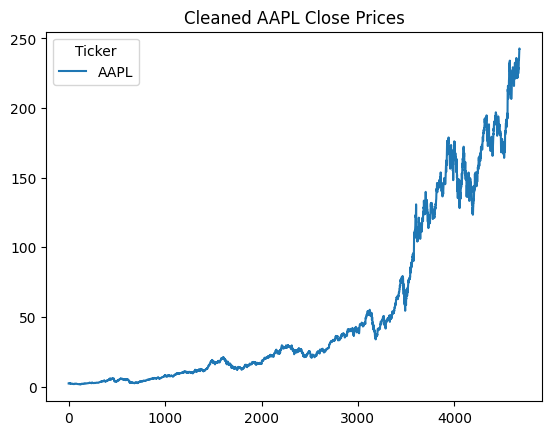

In [48]:
df = yf.download('AAPL', start='2006-01-01', end='2024-12-31')
print(df)

df_cleaned = df.dropna()

# Remove duplicate rows
df_cleaned = df_cleaned[~df_cleaned.index.duplicated(keep='first')]

# Check for consitency
expected_dates = pd.date_range(start='2006-01-01', end='2024-12-31', freq='B') 
missing_dates = expected_dates.difference(df_cleaned.index)

if len(missing_dates) > 0:
    print(f"Missing dates:\n{missing_dates}")
else:
    print("No missing dates found in the dataset.")

# Remove outliers
from scipy.stats import zscore
z_scores = zscore(df_cleaned[['Open', 'High', 'Low', 'Close', 'Volume']])
df_cleaned = df_cleaned[(z_scores < 3).all(axis=1)]  

df_cleaned.reset_index(inplace=True)

# Verify cleaned dataset
print("Cleaned dataset:")
print(df_cleaned.head())

# Checkk distribtion
plt.figure(figsize=(12, 5))
df_cleaned['Close'].plot(title='Cleaned AAPL Close Prices')
plt.show()

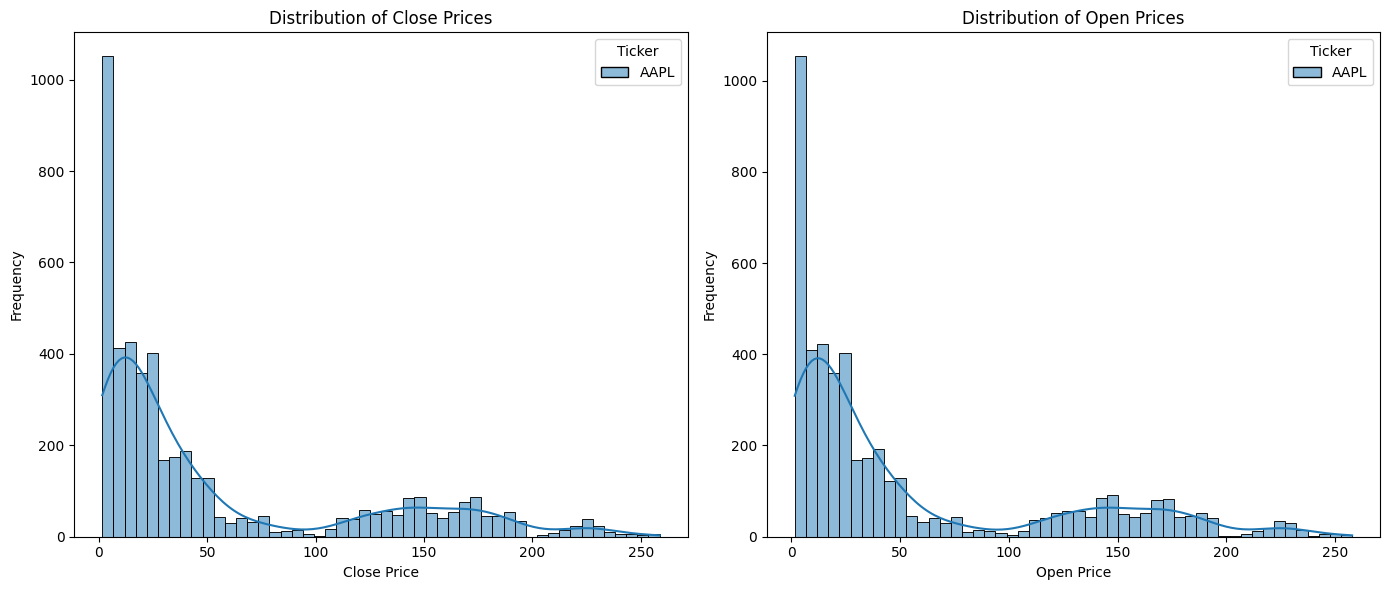

In [49]:
plt.figure(figsize=(14, 6))

# Close price distribution
plt.subplot(1, 2, 1)
sns.histplot(df['Close'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')

# Open price distribution
plt.subplot(1, 2, 2)
sns.histplot(df['Open'], bins=50, kde=True, color='salmon')
plt.title('Distribution of Open Prices')
plt.xlabel('Open Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<Figure size 1400x1000 with 0 Axes>

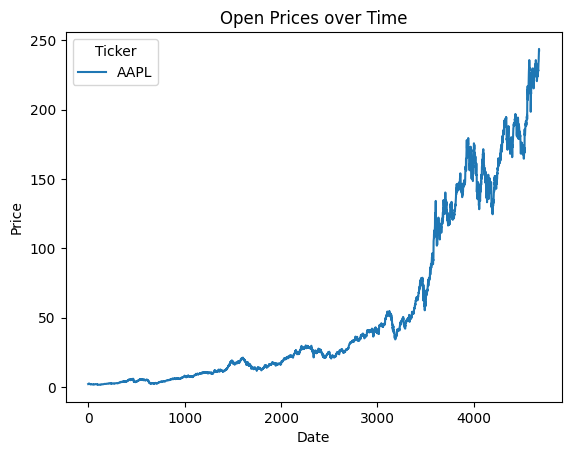

In [50]:
# Visualize the attributes: [Open, High, Low, Close, Volume]
plt.figure(figsize=(14, 10))

# Plot Open prices
df_cleaned['Open'].plot()
plt.title('Open Prices over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

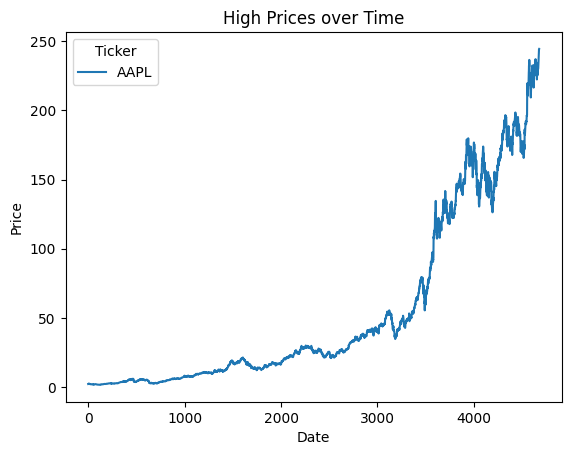

In [51]:
# Plot High prices
df_cleaned['High'].plot()
plt.title('High Prices over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

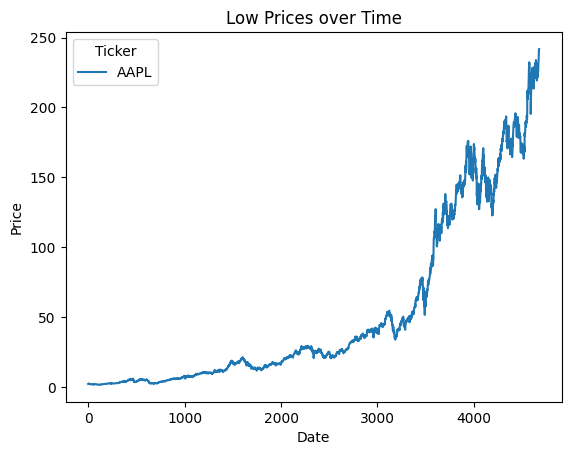

In [52]:
# Plot Low prices
df_cleaned['Low'].plot()
plt.title('Low Prices over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

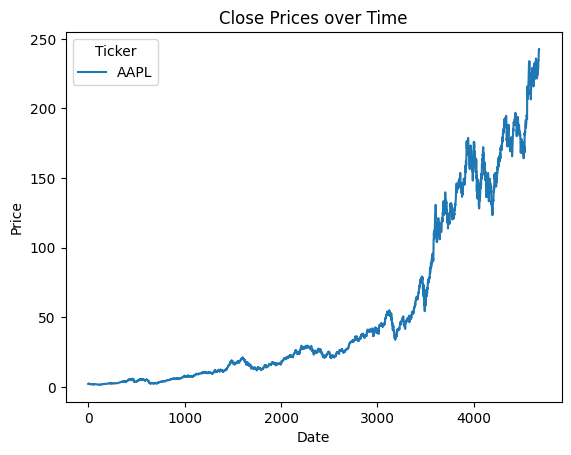

In [53]:
# Plot Close prices
df_cleaned['Close'].plot()
plt.title('Close Prices over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

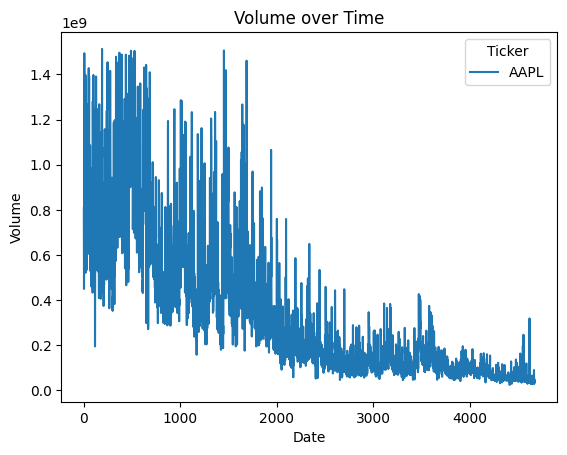

In [54]:
# Plot Volume
df_cleaned['Volume'].plot()
plt.title('Volume over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

/tmp/ipykernel_75829/1566797801.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_close = df['Close'].resample('M').mean()


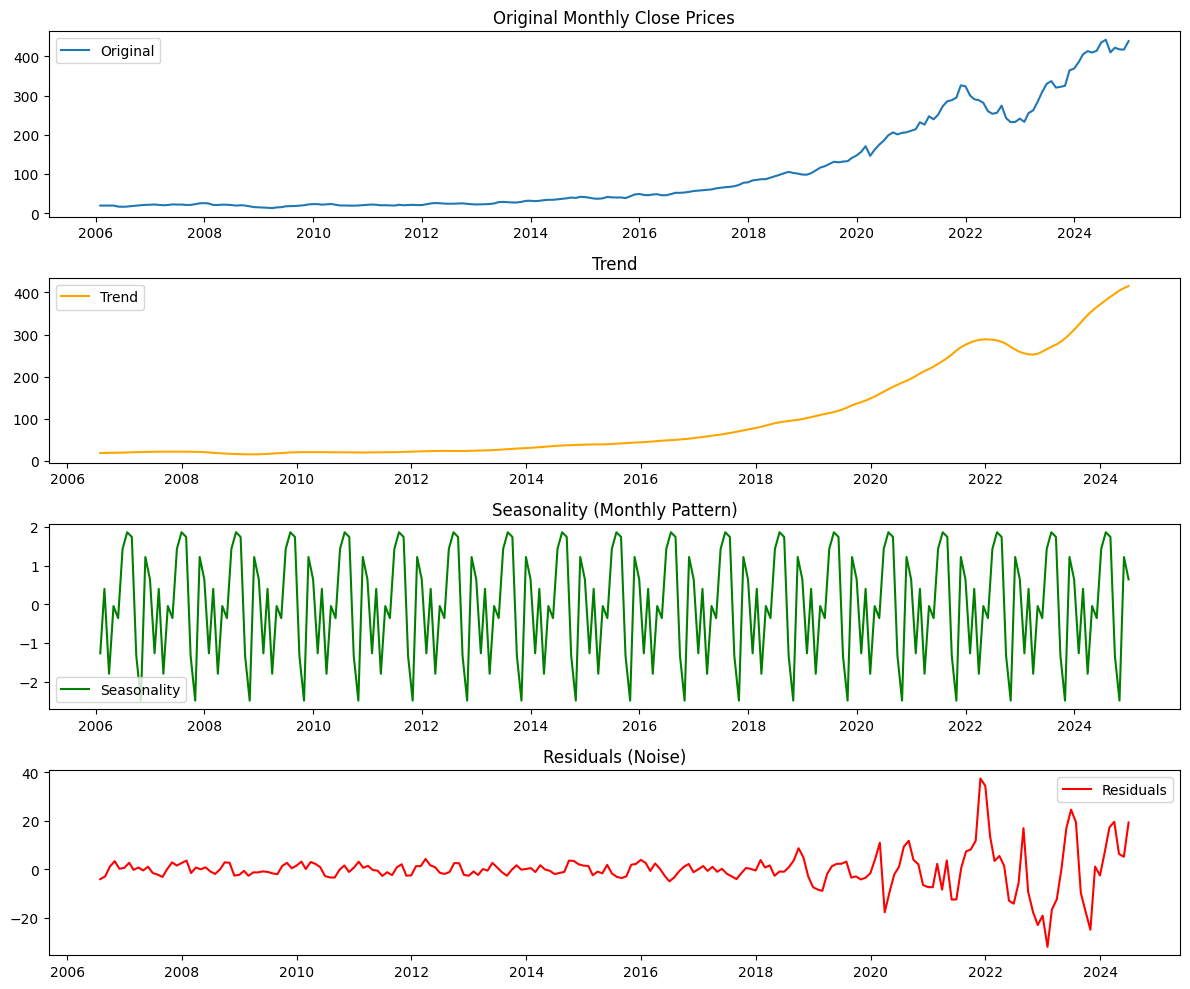

In [64]:
monthly_close = df['Close'].resample('M').mean()

# Decompose the time series
decomposition = seasonal_decompose(monthly_close, model='additive', period=12)

# Plot the components
plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
plt.plot(monthly_close, label='Original')
plt.title('Original Monthly Close Prices')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.title('Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.title('Seasonality (Monthly Pattern)')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.title('Residuals (Noise)')
plt.legend()

plt.tight_layout()
plt.show()

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            MSFT        MSFT        MSFT        MSFT       MSFT
Date                                                                 
2006-01-03   18.815382   18.927545   18.296627   18.401780   79973000
2006-01-04   18.906523   18.983635   18.766319   18.766319   57975600
2006-01-05   18.920540   19.018682   18.864458   18.899509   48245500
2006-01-06   18.864460   18.927552   18.570031   18.850439  100963000
2006-01-09   18.829401   18.976615   18.759299   18.878472   55625000
...                ...         ...         ...         ...        ...
2024-12-23  434.379028  436.774220  431.963858  435.866037   19152500
2024-12-24  438.450836  438.720315  433.321138  433.780209    7164500
2024-12-26  437.233276  440.057630  435.756258  438.201337    8194200
2024-12-27  429.668457  434.349074  425.496829  433.730320   18117700
2024-12-30  423.979858  426.694417  421.055729  425.207408   13158700

[4780 rows x 5 colu

<Figure size 1200x500 with 0 Axes>

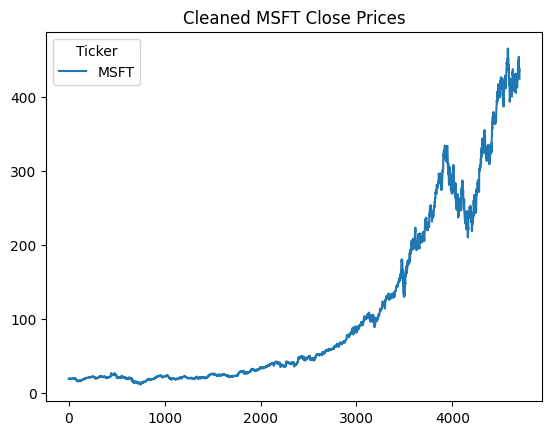

In [57]:
df = yf.download('MSFT', start='2006-01-01', end='2024-12-31')
print(df)

df_cleaned = df.dropna()

# Remove duplicate rows
df_cleaned = df_cleaned[~df_cleaned.index.duplicated(keep='first')]

# Check for consitency
expected_dates = pd.date_range(start='2006-01-01', end='2024-12-31', freq='B') 
missing_dates = expected_dates.difference(df_cleaned.index)

if len(missing_dates) > 0:
    print(f"Missing dates:\n{missing_dates}")
else:
    print("No missing dates found in the dataset.")

# Remove outliers
from scipy.stats import zscore
z_scores = zscore(df_cleaned[['Open', 'High', 'Low', 'Close', 'Volume']])
df_cleaned = df_cleaned[(z_scores < 3).all(axis=1)]  

df_cleaned.reset_index(inplace=True)

# Verify cleaned dataset
print("Cleaned dataset:")
print(df_cleaned.head())

# Checkk distribtion
plt.figure(figsize=(12, 5))
df_cleaned['Close'].plot(title='Cleaned MSFT Close Prices')
plt.show()

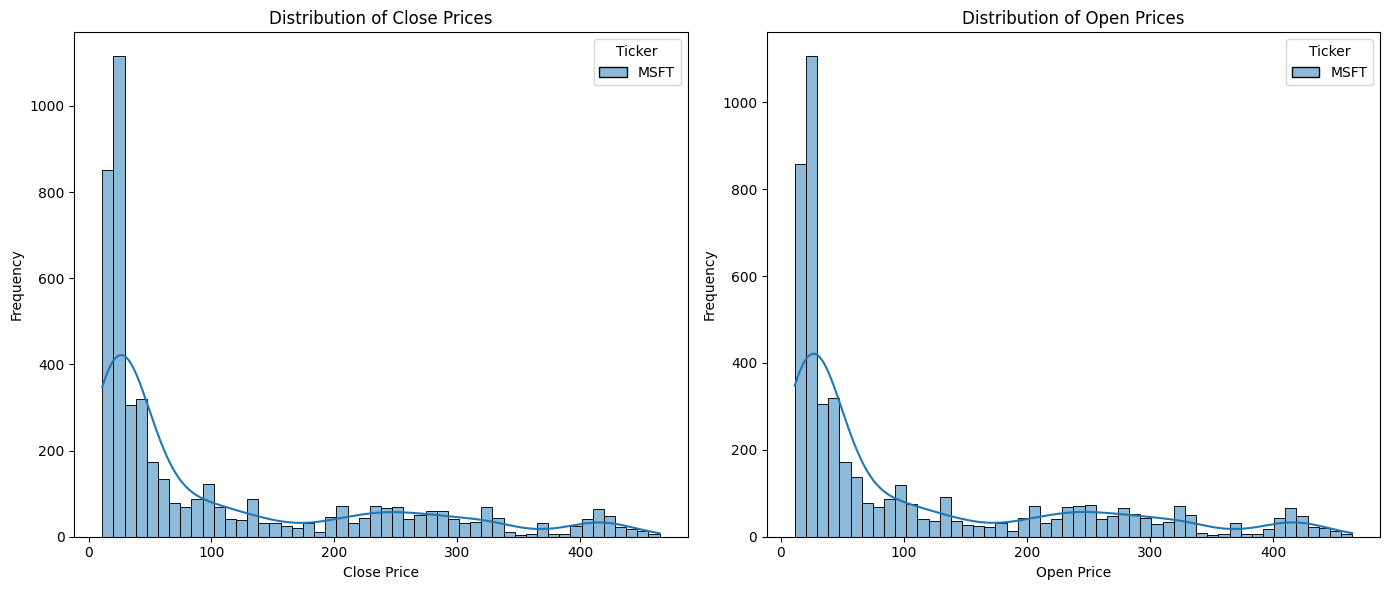

In [58]:
plt.figure(figsize=(14, 6))

# Close price distribution
plt.subplot(1, 2, 1)
sns.histplot(df['Close'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')

# Open price distribution
plt.subplot(1, 2, 2)
sns.histplot(df['Open'], bins=50, kde=True, color='salmon')
plt.title('Distribution of Open Prices')
plt.xlabel('Open Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<Figure size 1400x1000 with 0 Axes>

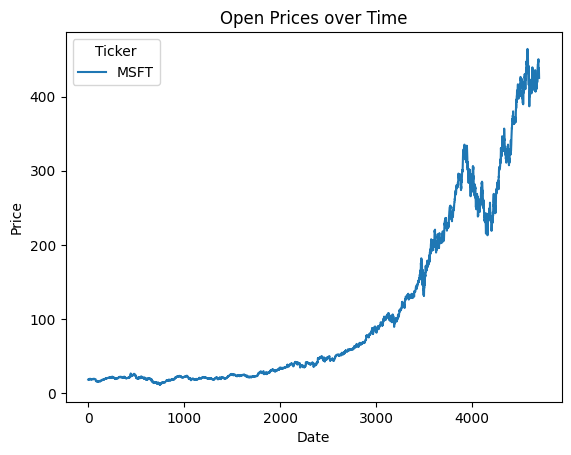

In [59]:
# Visualize the attributes: [Open, High, Low, Close, Volume]
plt.figure(figsize=(14, 10))

# Plot Open prices
df_cleaned['Open'].plot()
plt.title('Open Prices over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

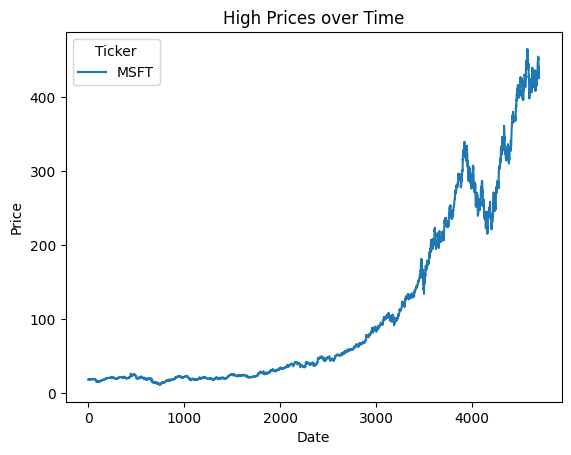

In [60]:
# Plot High prices
df_cleaned['High'].plot()
plt.title('High Prices over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

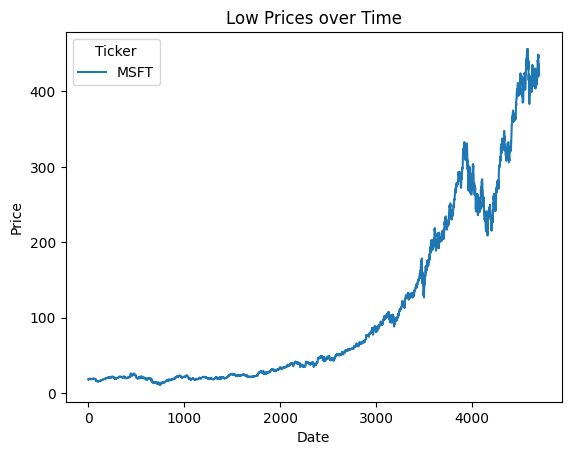

In [61]:
# Plot Low prices
df_cleaned['Low'].plot()
plt.title('Low Prices over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

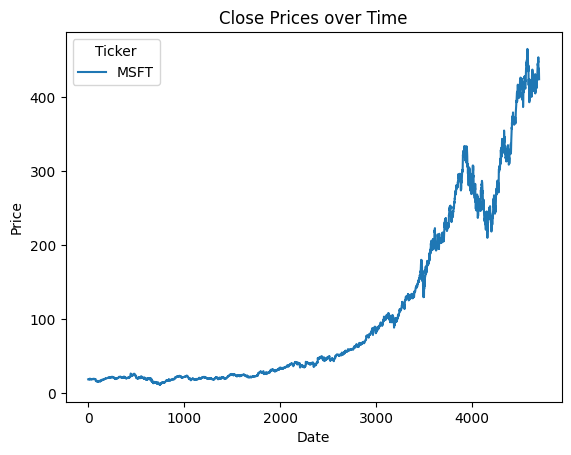

In [62]:
# Plot Close prices
df_cleaned['Close'].plot()
plt.title('Close Prices over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

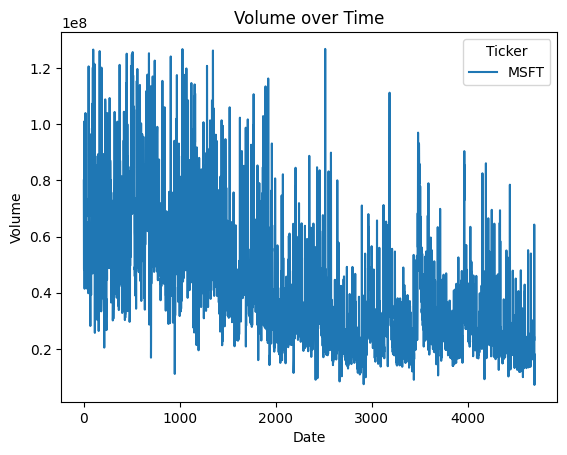

In [63]:
# Plot Volume
df_cleaned['Volume'].plot()
plt.title('Volume over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

/tmp/ipykernel_75829/1566797801.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_close = df['Close'].resample('M').mean()


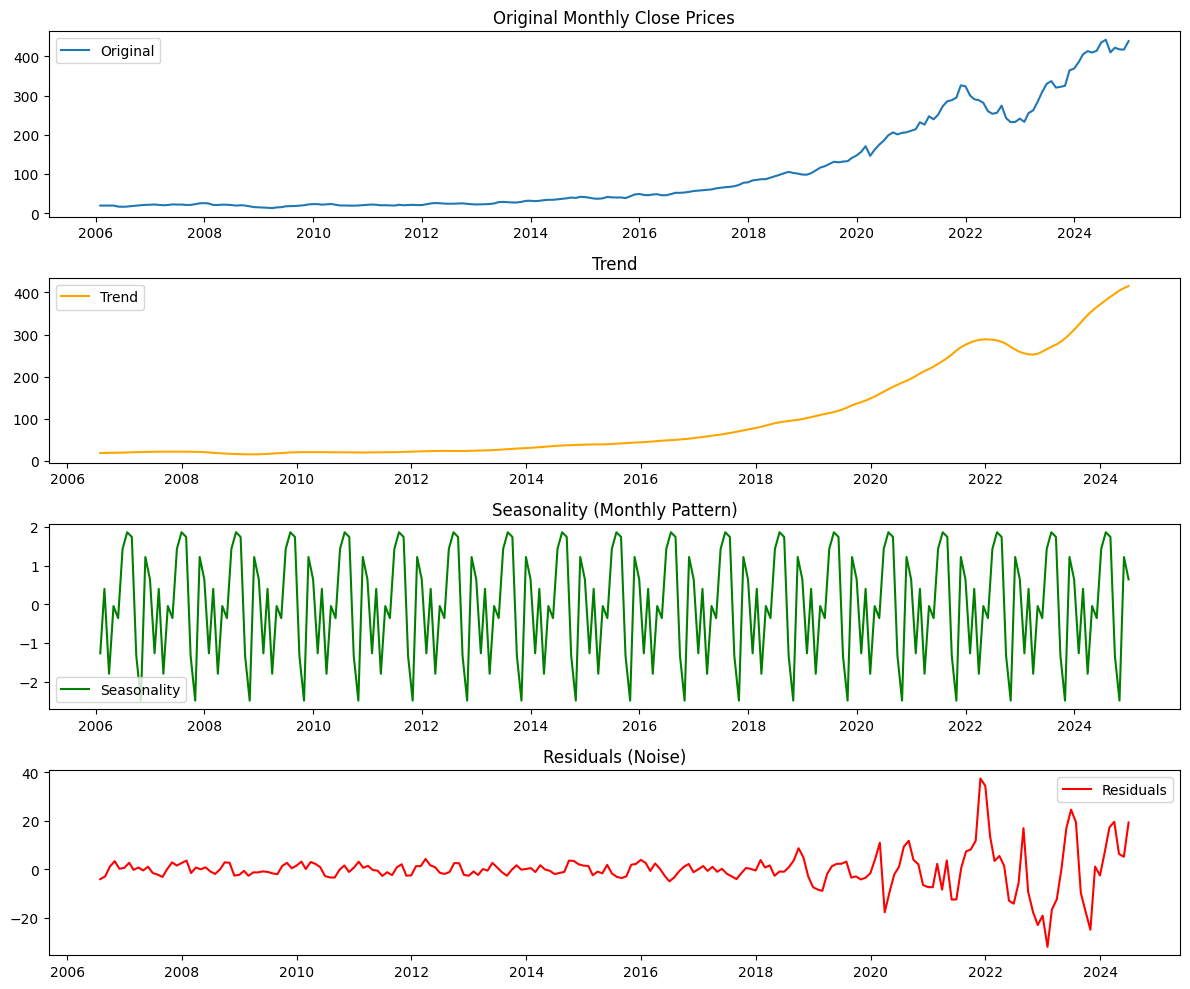

In [65]:
monthly_close = df['Close'].resample('M').mean()

# Decompose the time series
decomposition = seasonal_decompose(monthly_close, model='additive', period=12)

# Plot the components
plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
plt.plot(monthly_close, label='Original')
plt.title('Original Monthly Close Prices')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.title('Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.title('Seasonality (Monthly Pattern)')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.title('Residuals (Noise)')
plt.legend()

plt.tight_layout()
plt.show()

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker             IBM         IBM         IBM         IBM       IBM
Date                                                                
2006-01-03   43.143192   43.400811   42.486002   43.348235  12253995
2006-01-04   43.085369   43.374536   42.759407   43.216807  10285109
2006-01-05   43.374512   43.584812   42.717321   42.796183   7545216
2006-01-06   44.662590   44.704652   43.852933   44.136838   8573957
2006-01-09   44.021187   44.294577   43.837177   44.110567   7166251
...                ...         ...         ...         ...       ...
2024-12-23  220.461243  222.259277  219.616877  221.335424   2988100
2024-12-24  222.924835  222.954635  220.073819  220.798999   1186200
2024-12-26  223.401657  223.908276  221.077147  221.832112   3286500
2024-12-27  221.305618  222.934764  219.944690  221.663236   1810800
2024-12-30  218.792374  220.123502  216.209575  219.080448   2095600

[4780 rows x 5 columns]
Missing d

<Figure size 1200x500 with 0 Axes>

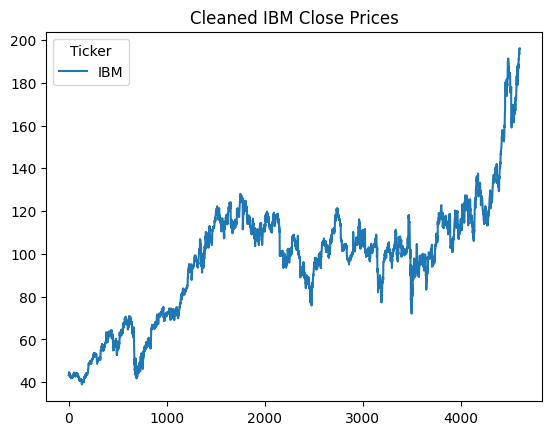

In [66]:
df = yf.download('IBM', start='2006-01-01', end='2024-12-31')
print(df)

df_cleaned = df.dropna()

# Remove duplicate rows
df_cleaned = df_cleaned[~df_cleaned.index.duplicated(keep='first')]

# Check for consitency
expected_dates = pd.date_range(start='2006-01-01', end='2024-12-31', freq='B') 
missing_dates = expected_dates.difference(df_cleaned.index)

if len(missing_dates) > 0:
    print(f"Missing dates:\n{missing_dates}")
else:
    print("No missing dates found in the dataset.")

# Remove outliers
from scipy.stats import zscore
z_scores = zscore(df_cleaned[['Open', 'High', 'Low', 'Close', 'Volume']])
df_cleaned = df_cleaned[(z_scores < 3).all(axis=1)]  

df_cleaned.reset_index(inplace=True)

# Verify cleaned dataset
print("Cleaned dataset:")
print(df_cleaned.head())

# Checkk distribtion
plt.figure(figsize=(12, 5))
df_cleaned['Close'].plot(title='Cleaned IBM Close Prices')
plt.show()

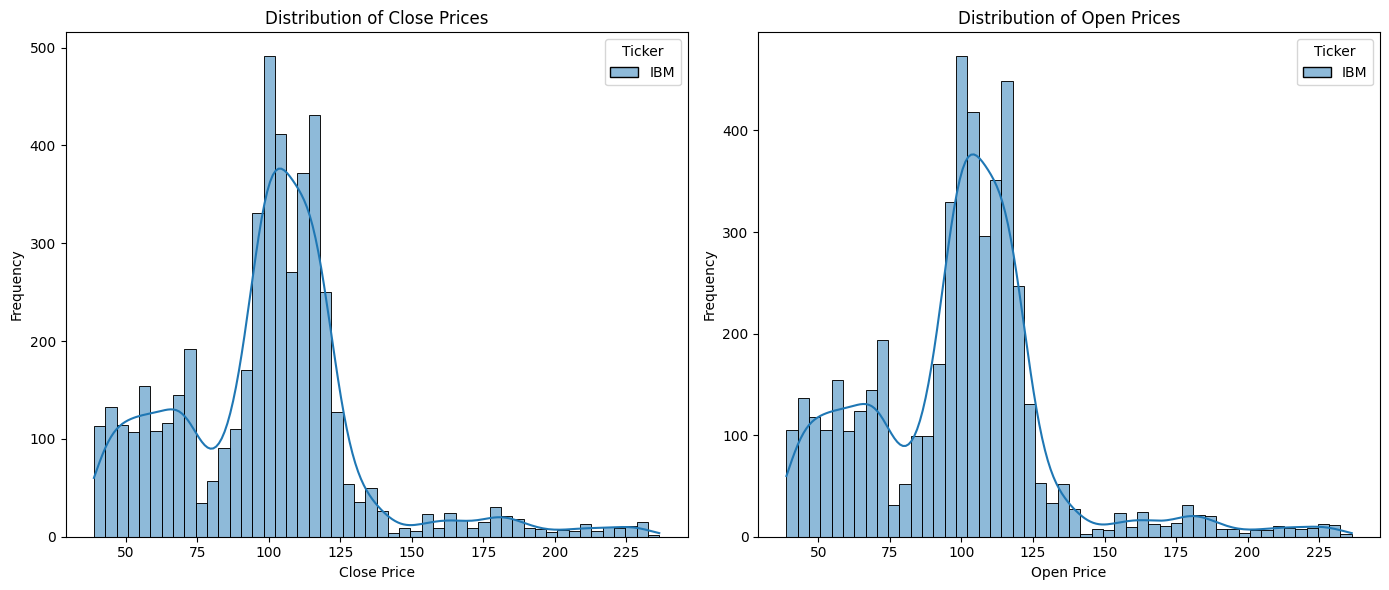

In [67]:
plt.figure(figsize=(14, 6))

# Close price distribution
plt.subplot(1, 2, 1)
sns.histplot(df['Close'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')

# Open price distribution
plt.subplot(1, 2, 2)
sns.histplot(df['Open'], bins=50, kde=True, color='salmon')
plt.title('Distribution of Open Prices')
plt.xlabel('Open Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<Figure size 1400x1000 with 0 Axes>

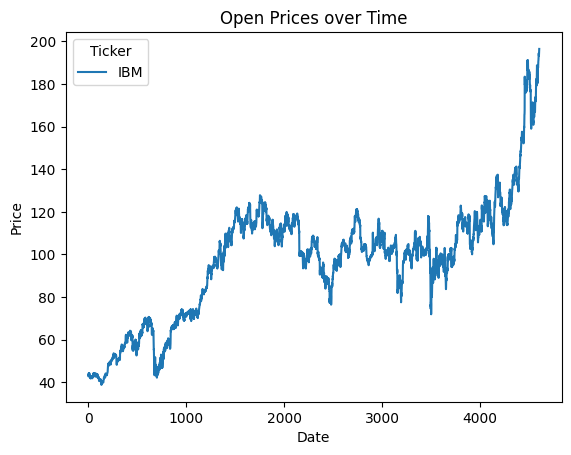

In [68]:
# Visualize the attributes: [Open, High, Low, Close, Volume]
plt.figure(figsize=(14, 10))

# Plot Open prices
df_cleaned['Open'].plot()
plt.title('Open Prices over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

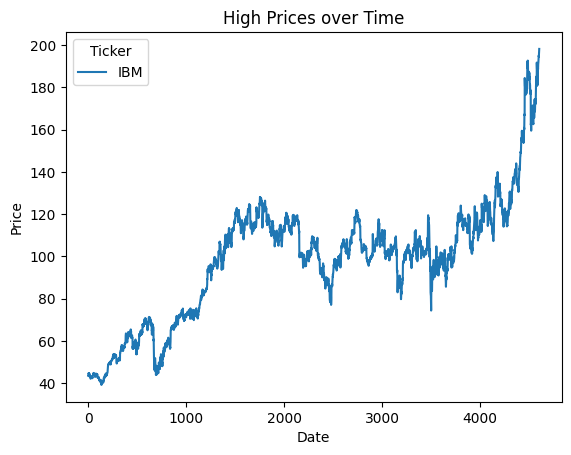

In [69]:
# Plot High prices
df_cleaned['High'].plot()
plt.title('High Prices over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

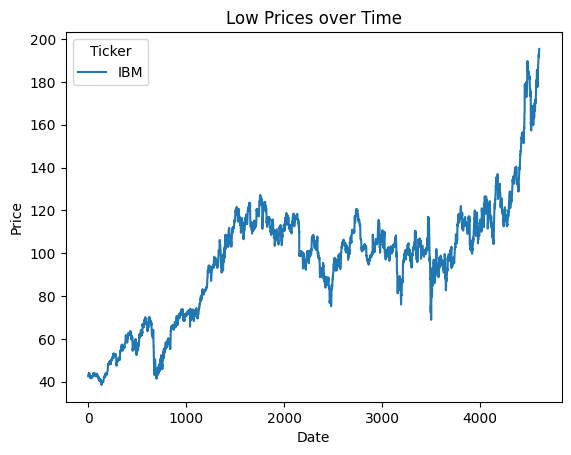

In [70]:
# Plot Low prices
df_cleaned['Low'].plot()
plt.title('Low Prices over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

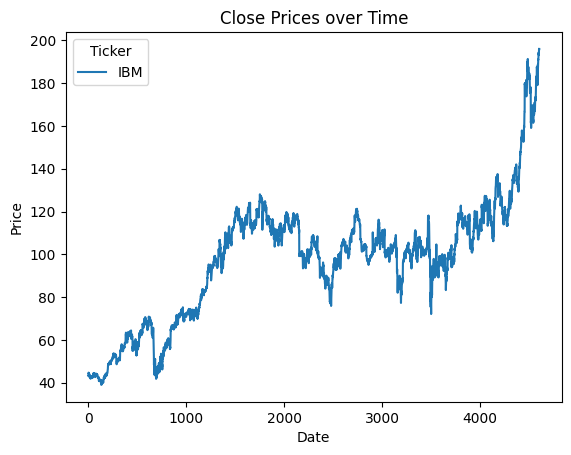

In [71]:
# Plot Close prices
df_cleaned['Close'].plot()
plt.title('Close Prices over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

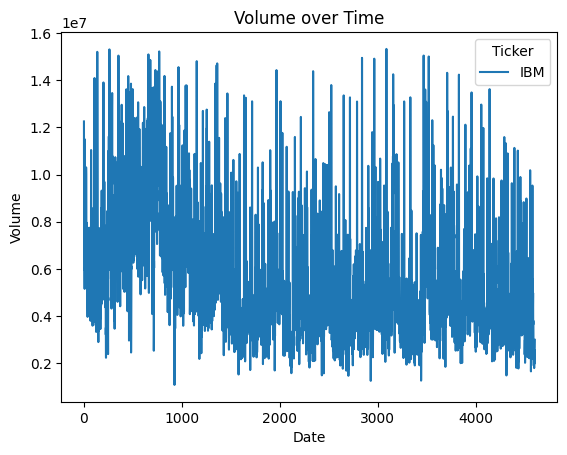

In [72]:
# Plot Volume
df_cleaned['Volume'].plot()
plt.title('Volume over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

/tmp/ipykernel_75829/1566797801.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_close = df['Close'].resample('M').mean()


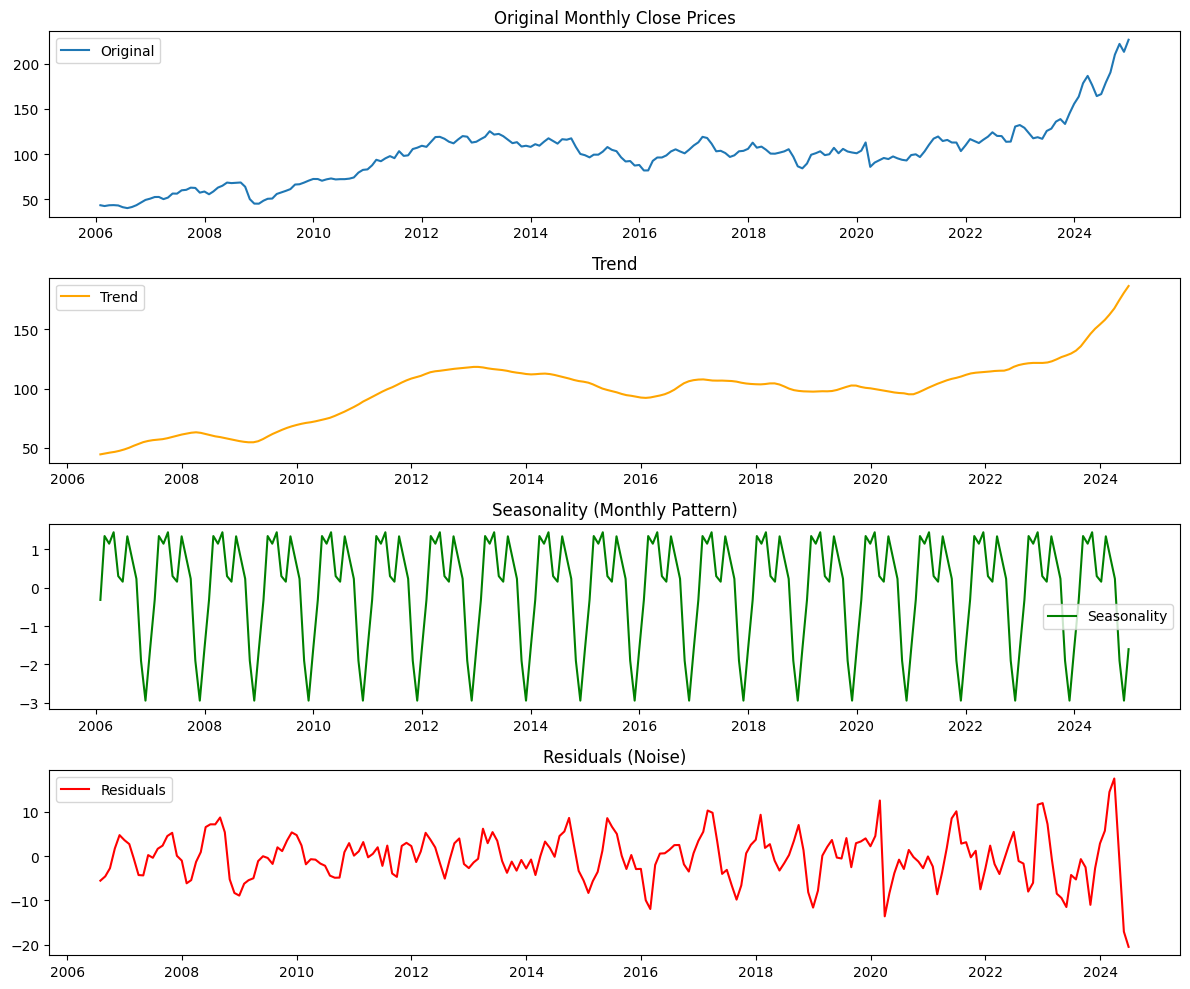

In [73]:
monthly_close = df['Close'].resample('M').mean()

# Decompose the time series
decomposition = seasonal_decompose(monthly_close, model='additive', period=12)

# Plot the components
plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
plt.plot(monthly_close, label='Original')
plt.title('Original Monthly Close Prices')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.title('Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.title('Seasonality (Monthly Pattern)')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.title('Residuals (Noise)')
plt.legend()

plt.tight_layout()
plt.show()

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            AMZN        AMZN        AMZN        AMZN       AMZN
Date                                                                 
2006-01-03    2.379000    2.392500    2.312500    2.373500  151644000
2006-01-04    2.362500    2.386500    2.334500    2.374500  148818000
2006-01-05    2.382500    2.410000    2.355500    2.358000  108344000
2006-01-06    2.393500    2.429000    2.366000    2.398500  123058000
2006-01-09    2.354000    2.355000    2.320000    2.327500  178862000
...                ...         ...         ...         ...        ...
2024-12-23  225.059998  226.880005  223.899994  225.009995   28070000
2024-12-24  229.050003  229.139999  226.130005  226.940002   15007500
2024-12-26  227.050003  228.500000  226.669998  228.500000   16146700
2024-12-27  223.750000  226.029999  220.899994  225.600006   27367100
2024-12-30  221.300003  223.000000  218.429993  220.059998   28321200

[4780 rows x 5 colu

<Figure size 1200x500 with 0 Axes>

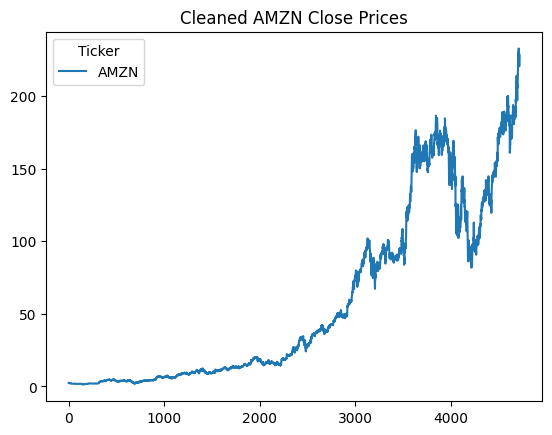

In [74]:
df = yf.download('AMZN', start='2006-01-01', end='2024-12-31')
print(df)

df_cleaned = df.dropna()

# Remove duplicate rows
df_cleaned = df_cleaned[~df_cleaned.index.duplicated(keep='first')]

# Check for consitency
expected_dates = pd.date_range(start='2006-01-01', end='2024-12-31', freq='B') 
missing_dates = expected_dates.difference(df_cleaned.index)

if len(missing_dates) > 0:
    print(f"Missing dates:\n{missing_dates}")
else:
    print("No missing dates found in the dataset.")

# Remove outliers
from scipy.stats import zscore
z_scores = zscore(df_cleaned[['Open', 'High', 'Low', 'Close', 'Volume']])
df_cleaned = df_cleaned[(z_scores < 3).all(axis=1)]  

df_cleaned.reset_index(inplace=True)

# Verify cleaned dataset
print("Cleaned dataset:")
print(df_cleaned.head())

# Checkk distribtion
plt.figure(figsize=(12, 5))
df_cleaned['Close'].plot(title='Cleaned AMZN Close Prices')
plt.show()

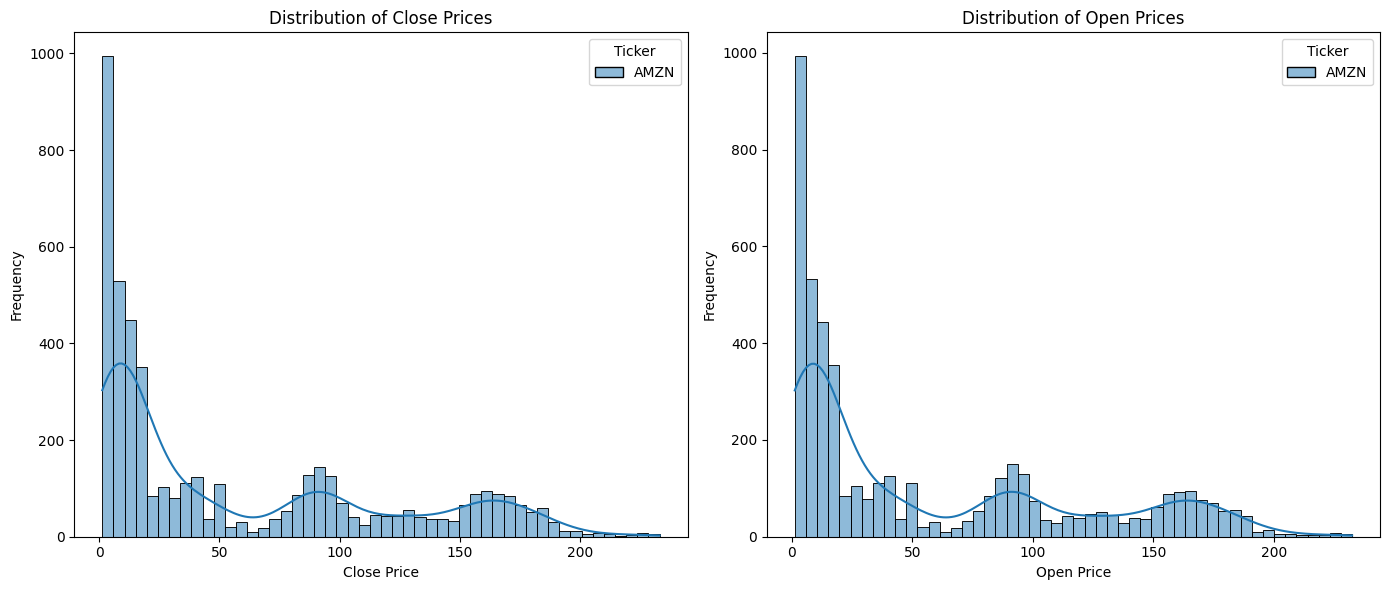

In [75]:
plt.figure(figsize=(14, 6))

# Close price distribution
plt.subplot(1, 2, 1)
sns.histplot(df['Close'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')

# Open price distribution
plt.subplot(1, 2, 2)
sns.histplot(df['Open'], bins=50, kde=True, color='salmon')
plt.title('Distribution of Open Prices')
plt.xlabel('Open Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<Figure size 1400x1000 with 0 Axes>

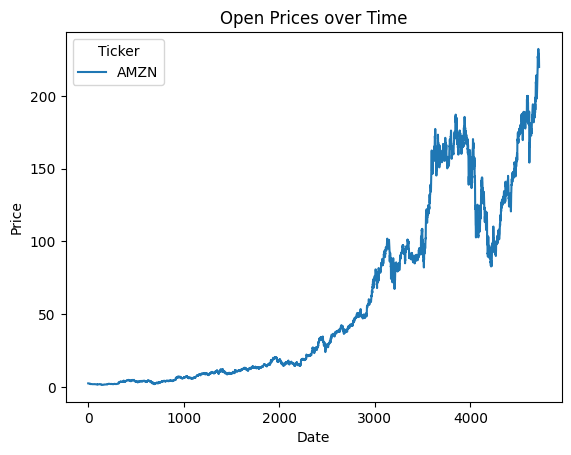

In [76]:
# Visualize the attributes: [Open, High, Low, Close, Volume]
plt.figure(figsize=(14, 10))

# Plot Open prices
df_cleaned['Open'].plot()
plt.title('Open Prices over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

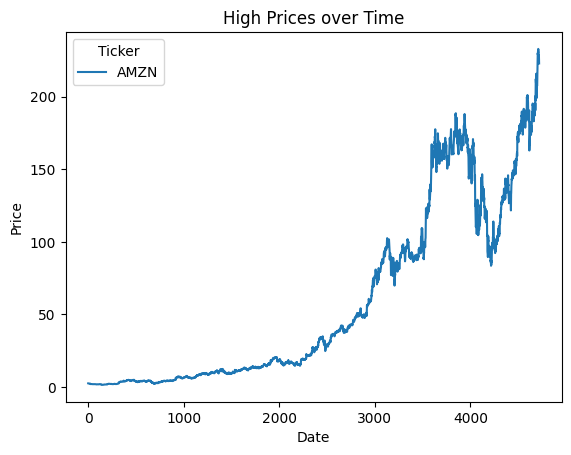

In [77]:
# Plot High prices
df_cleaned['High'].plot()
plt.title('High Prices over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

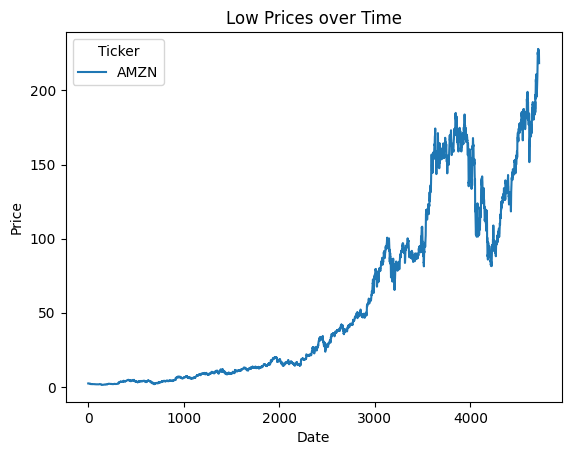

In [78]:
# Plot Low prices
df_cleaned['Low'].plot()
plt.title('Low Prices over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

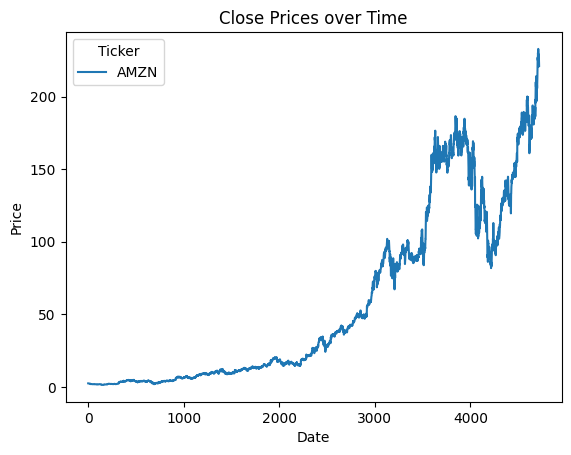

In [79]:
# Plot Close prices
df_cleaned['Close'].plot()
plt.title('Close Prices over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

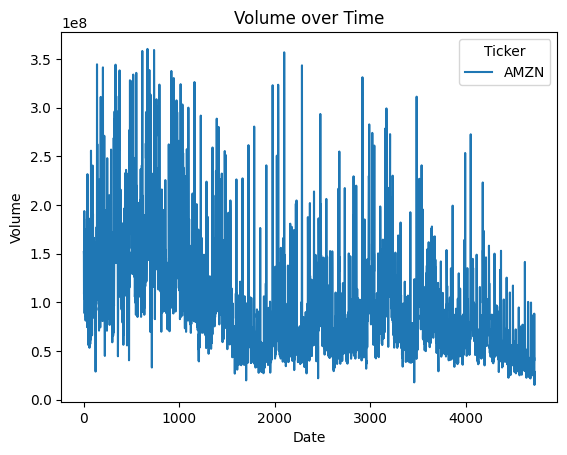

In [80]:
# Plot Volume
df_cleaned['Volume'].plot()
plt.title('Volume over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

/tmp/ipykernel_75829/1566797801.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_close = df['Close'].resample('M').mean()


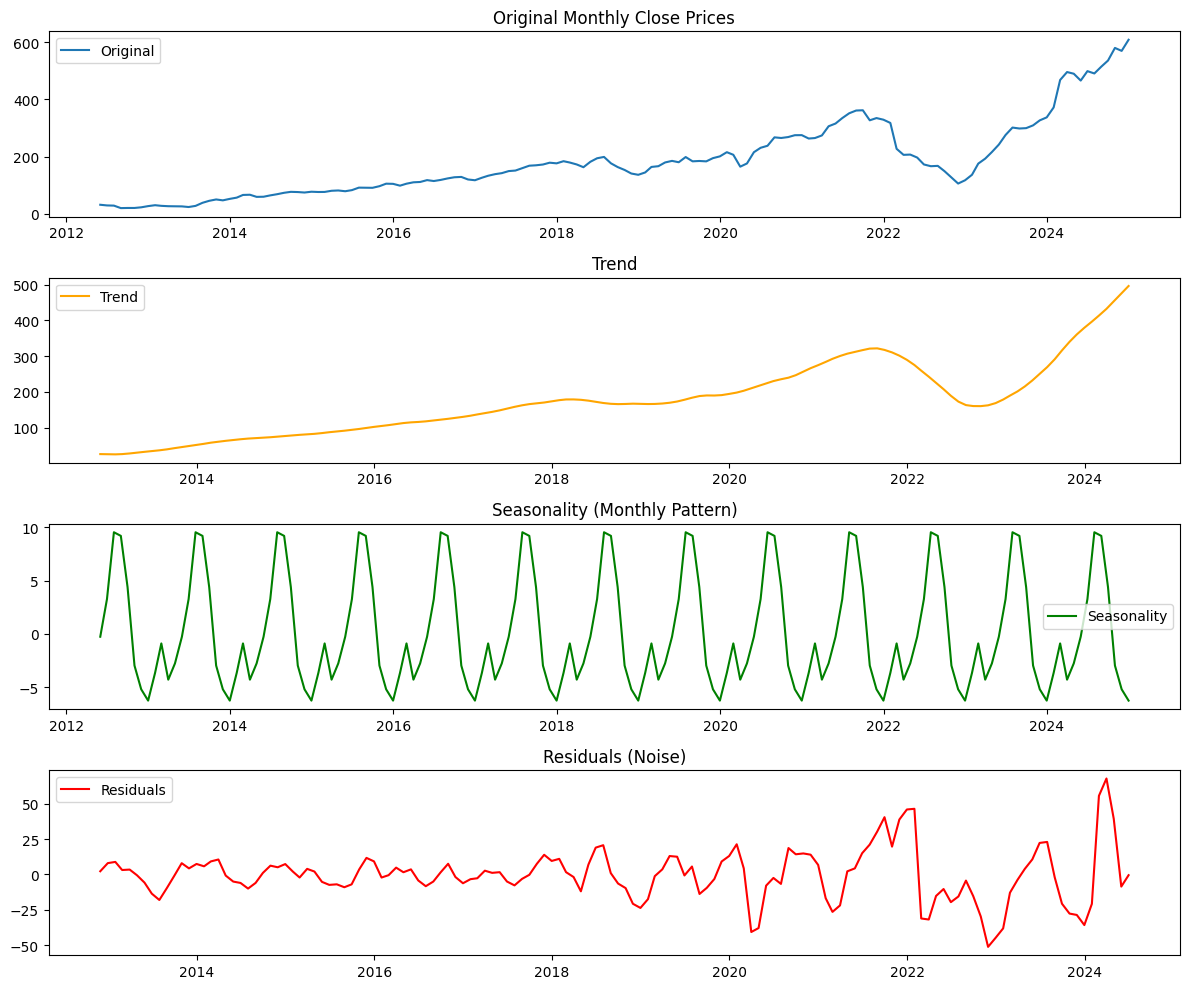

In [82]:
monthly_close = df['Close'].resample('M').mean()

# Decompose the time series
decomposition = seasonal_decompose(monthly_close, model='additive', period=12)

# Plot the components
plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
plt.plot(monthly_close, label='Original')
plt.title('Original Monthly Close Prices')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.title('Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.title('Seasonality (Monthly Pattern)')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.title('Residuals (Noise)')
plt.legend()

plt.tight_layout()
plt.show()

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            META        META        META        META       META
Date                                                                 
2012-05-18   38.050663   44.788905   37.821742   41.852743  573576400
2012-05-21   33.870369   36.488033   32.845202   36.358642  168192700
2012-05-22   30.854584   33.432435   30.794866   32.457032  101786600
2012-05-23   31.849892   32.347546   31.212894   31.222848   73600000
2012-05-24   32.875057   33.054213   31.620969   32.795434   50237200
...                ...         ...         ...         ...        ...
2024-12-23  599.316772  600.555721  585.728886  589.075884   10205800
2024-12-24  607.209778  607.449555  598.747336  602.184220    4726100
2024-12-26  602.813660  605.761050  598.407607  604.941771    6081400
2024-12-27  599.276855  601.315020  589.275743  598.877187    8084200
2024-12-30  590.714417  596.409362  585.059475  588.226640    7025900

[3174 rows x 5 colu

<Figure size 1200x500 with 0 Axes>

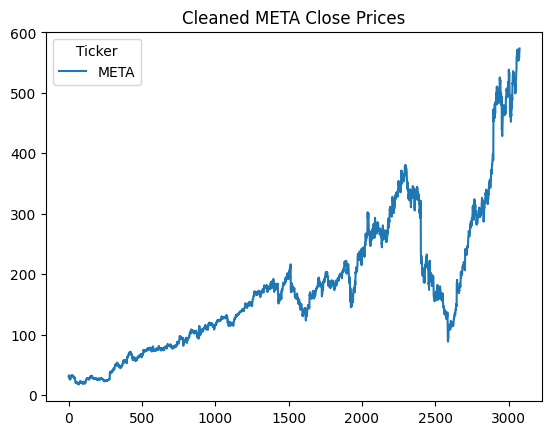

In [106]:
df = yf.download('META', start='2006-01-01', end='2024-12-31')
print(df)

df_cleaned = df.dropna()

# Remove duplicate rows
df_cleaned = df_cleaned[~df_cleaned.index.duplicated(keep='first')]

# Check for consitency
expected_dates = pd.date_range(start='2006-01-01', end='2024-12-31', freq='B') 
missing_dates = expected_dates.difference(df_cleaned.index)

if len(missing_dates) > 0:
    print(f"Missing dates:\n{missing_dates}")
else:
    print("No missing dates found in the dataset.")

# Remove outliers
from scipy.stats import zscore
z_scores = zscore(df_cleaned[['Open', 'High', 'Low', 'Close', 'Volume']])
df_cleaned = df_cleaned[(z_scores < 3).all(axis=1)]  

df_cleaned.reset_index(inplace=True)

# Verify cleaned dataset
print("Cleaned dataset:")
print(df_cleaned.head())

# Checkk distribtion
plt.figure(figsize=(12, 5))
df_cleaned['Close'].plot(title='Cleaned META Close Prices')
plt.show()

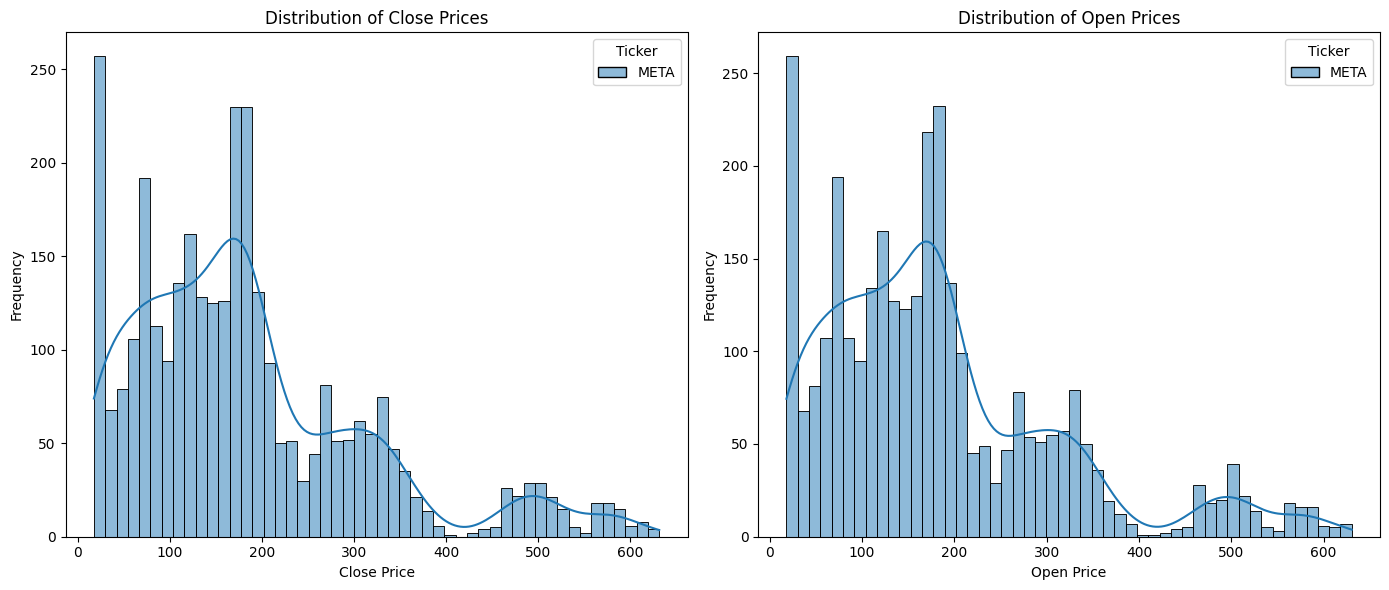

In [107]:
plt.figure(figsize=(14, 6))

# Close price distribution
plt.subplot(1, 2, 1)
sns.histplot(df['Close'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')

# Open price distribution
plt.subplot(1, 2, 2)
sns.histplot(df['Open'], bins=50, kde=True, color='salmon')
plt.title('Distribution of Open Prices')
plt.xlabel('Open Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<Figure size 1400x1000 with 0 Axes>

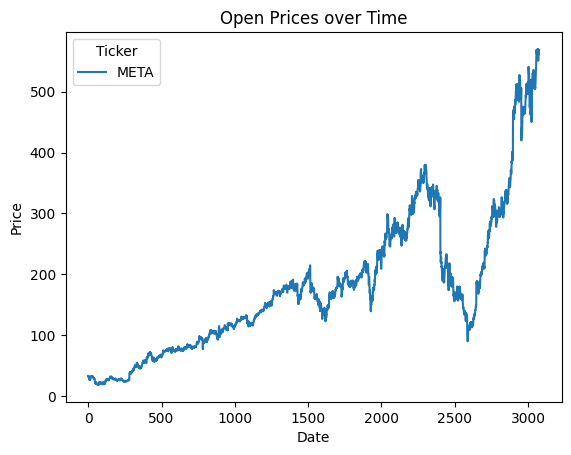

In [108]:
# Visualize the attributes: [Open, High, Low, Close, Volume]
plt.figure(figsize=(14, 10))

# Plot Open prices
df_cleaned['Open'].plot()
plt.title('Open Prices over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

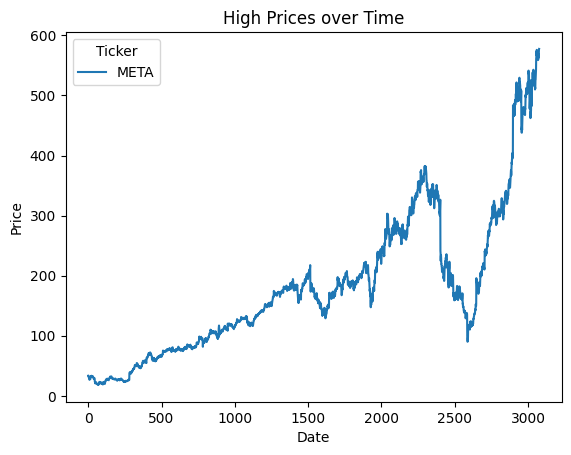

In [109]:
# Plot High prices
df_cleaned['High'].plot()
plt.title('High Prices over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

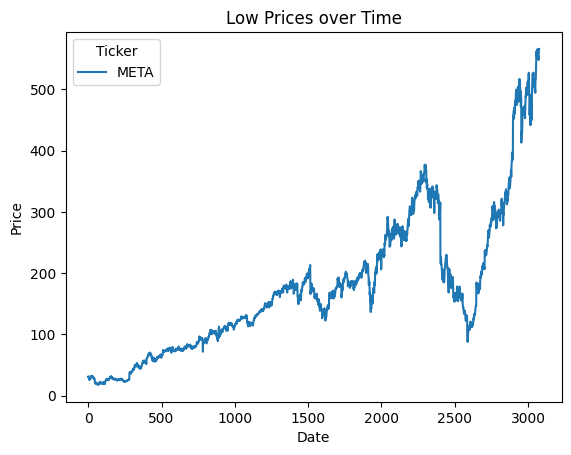

In [110]:
# Plot Low prices
df_cleaned['Low'].plot()
plt.title('Low Prices over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

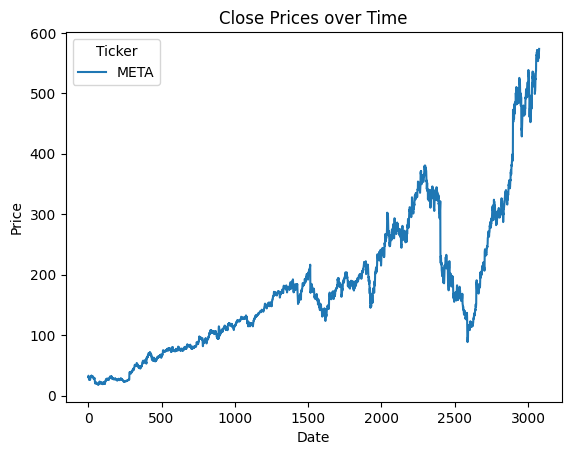

In [111]:
# Plot Close prices
df_cleaned['Close'].plot()
plt.title('Close Prices over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

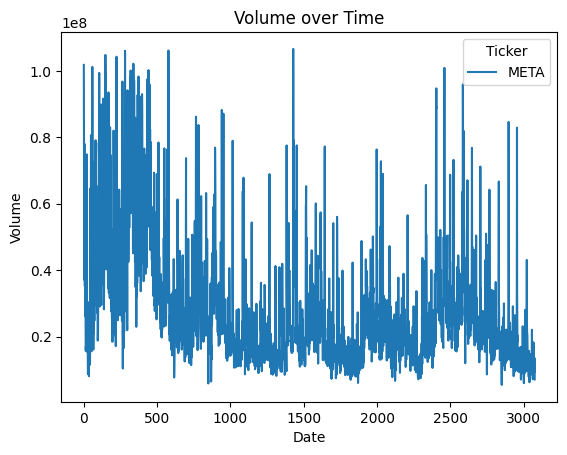

In [112]:
# Plot Volume
df_cleaned['Volume'].plot()
plt.title('Volume over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

/tmp/ipykernel_75829/1566797801.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_close = df['Close'].resample('M').mean()


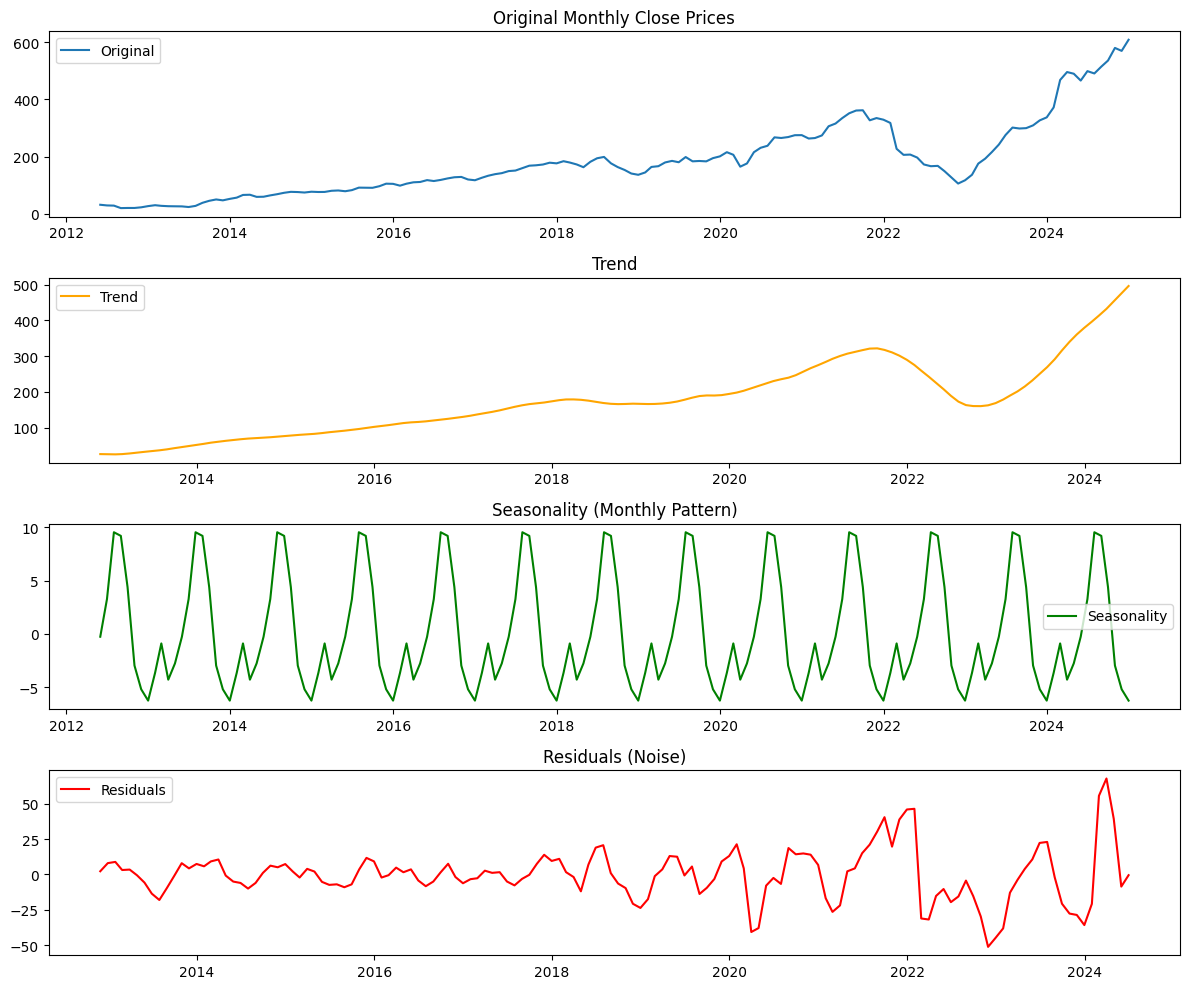

In [113]:
monthly_close = df['Close'].resample('M').mean()

# Decompose the time series
decomposition = seasonal_decompose(monthly_close, model='additive', period=12)

# Plot the components
plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
plt.plot(monthly_close, label='Original')
plt.title('Original Monthly Close Prices')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.title('Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.title('Seasonality (Monthly Pattern)')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.title('Residuals (Noise)')
plt.legend()

plt.tight_layout()
plt.show()

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            NFLX        NFLX        NFLX        NFLX      NFLX
Date                                                                
2006-01-03    3.721429    3.874286    3.588571    3.865714  15659700
2006-01-04    3.571429    3.680000    3.517143    3.642857  15950200
2006-01-05    3.561429    3.578571    3.535714    3.552857   8123500
2006-01-06    3.575714    3.648571    3.547143    3.560000   8539300
2006-01-09    3.571429    3.607143    3.500000    3.572857   8081500
...                ...         ...         ...         ...       ...
2024-12-23  911.450012  915.000000  899.099976  913.419983   2339400
2024-12-24  932.119995  935.849976  911.700012  915.000000   2320300
2024-12-26  924.140015  930.489990  915.299988  928.400024   2340300
2024-12-27  907.549988  918.130005  894.500000  916.010010   3226200
2024-12-30  900.429993  908.229980  889.710022  894.510010   2203000

[4780 rows x 5 columns]
Missing d

<Figure size 1200x500 with 0 Axes>

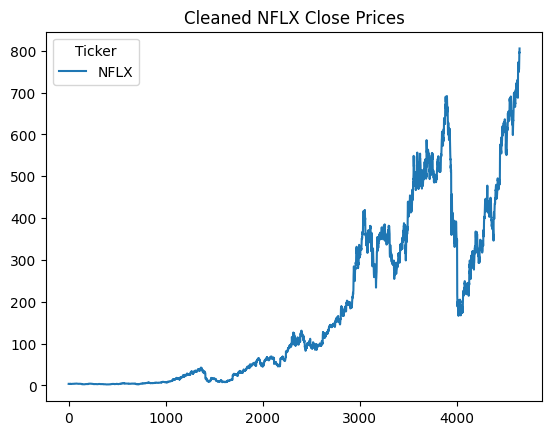

In [114]:
df = yf.download('NFLX', start='2006-01-01', end='2024-12-31')
print(df)

df_cleaned = df.dropna()

# Remove duplicate rows
df_cleaned = df_cleaned[~df_cleaned.index.duplicated(keep='first')]

# Check for consitency
expected_dates = pd.date_range(start='2006-01-01', end='2024-12-31', freq='B') 
missing_dates = expected_dates.difference(df_cleaned.index)

if len(missing_dates) > 0:
    print(f"Missing dates:\n{missing_dates}")
else:
    print("No missing dates found in the dataset.")

# Remove outliers
from scipy.stats import zscore
z_scores = zscore(df_cleaned[['Open', 'High', 'Low', 'Close', 'Volume']])
df_cleaned = df_cleaned[(z_scores < 3).all(axis=1)]  

df_cleaned.reset_index(inplace=True)

# Verify cleaned dataset
print("Cleaned dataset:")
print(df_cleaned.head())

# Checkk distribtion
plt.figure(figsize=(12, 5))
df_cleaned['Close'].plot(title='Cleaned NFLX Close Prices')
plt.show()

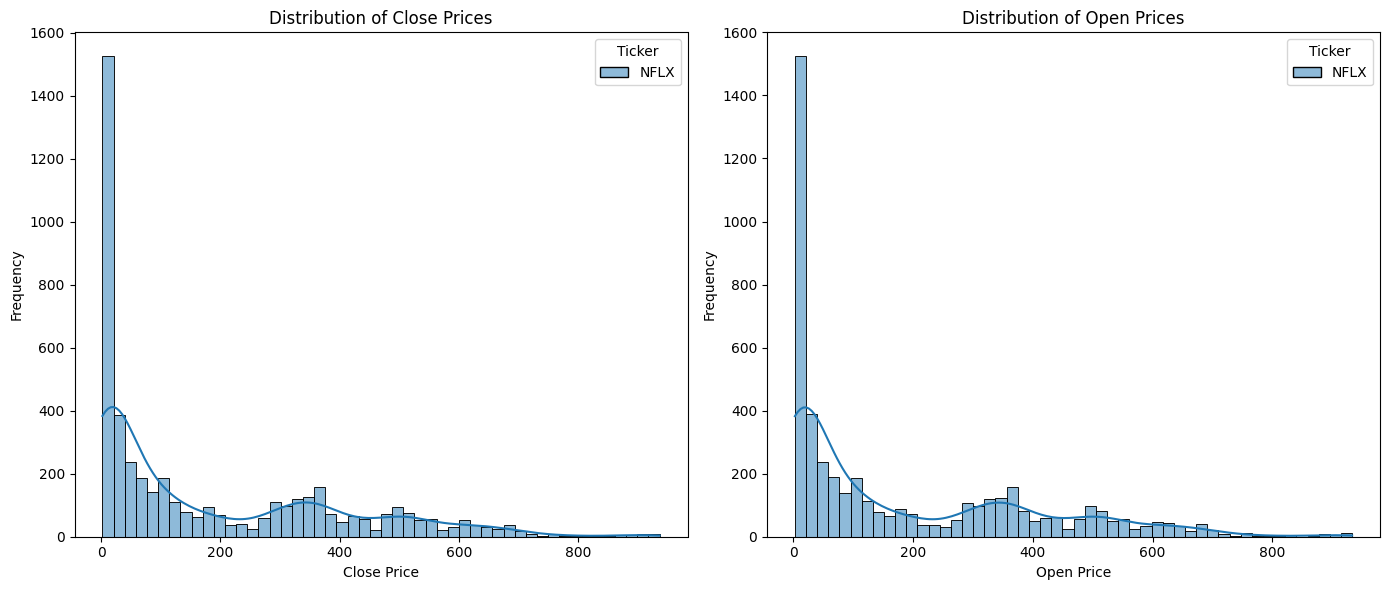

In [115]:
plt.figure(figsize=(14, 6))

# Close price distribution
plt.subplot(1, 2, 1)
sns.histplot(df['Close'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')

# Open price distribution
plt.subplot(1, 2, 2)
sns.histplot(df['Open'], bins=50, kde=True, color='salmon')
plt.title('Distribution of Open Prices')
plt.xlabel('Open Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<Figure size 1400x1000 with 0 Axes>

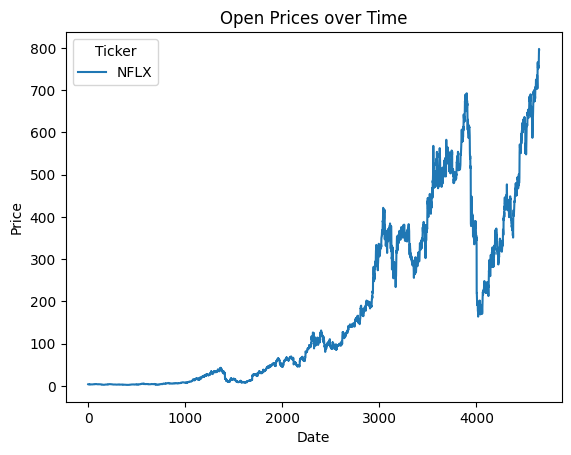

In [116]:
# Visualize the attributes: [Open, High, Low, Close, Volume]
plt.figure(figsize=(14, 10))

# Plot Open prices
df_cleaned['Open'].plot()
plt.title('Open Prices over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

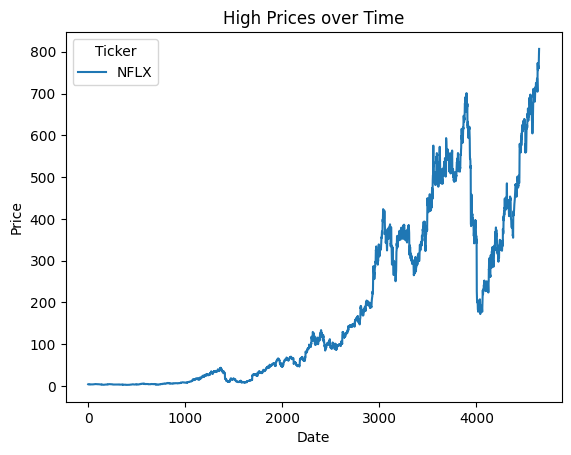

In [117]:
# Plot High prices
df_cleaned['High'].plot()
plt.title('High Prices over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

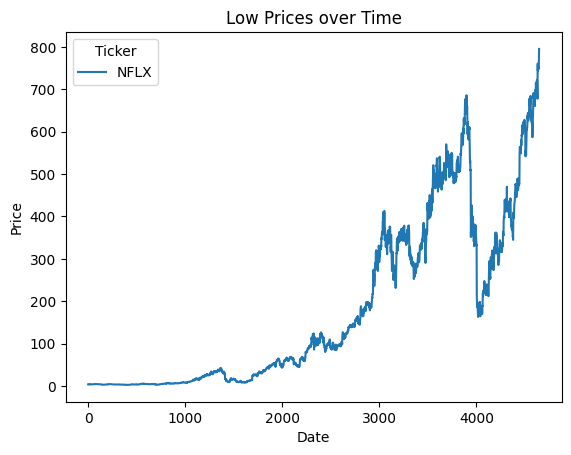

In [118]:
# Plot Low prices
df_cleaned['Low'].plot()
plt.title('Low Prices over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

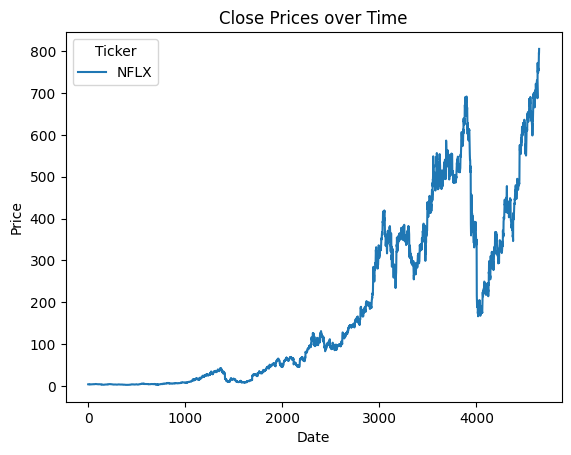

In [119]:
# Plot Close prices
df_cleaned['Close'].plot()
plt.title('Close Prices over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

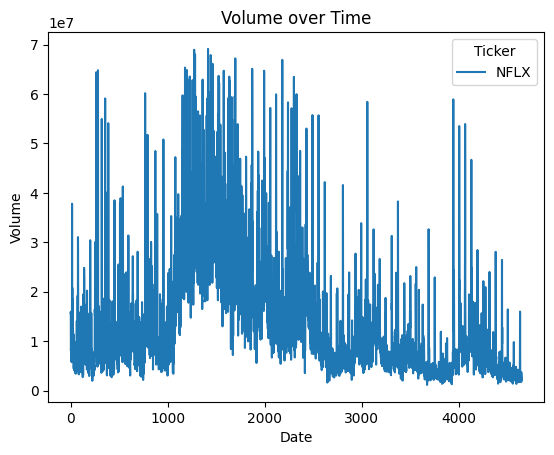

In [120]:
# Plot Volume
df_cleaned['Volume'].plot()
plt.title('Volume over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

/tmp/ipykernel_75829/1566797801.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_close = df['Close'].resample('M').mean()


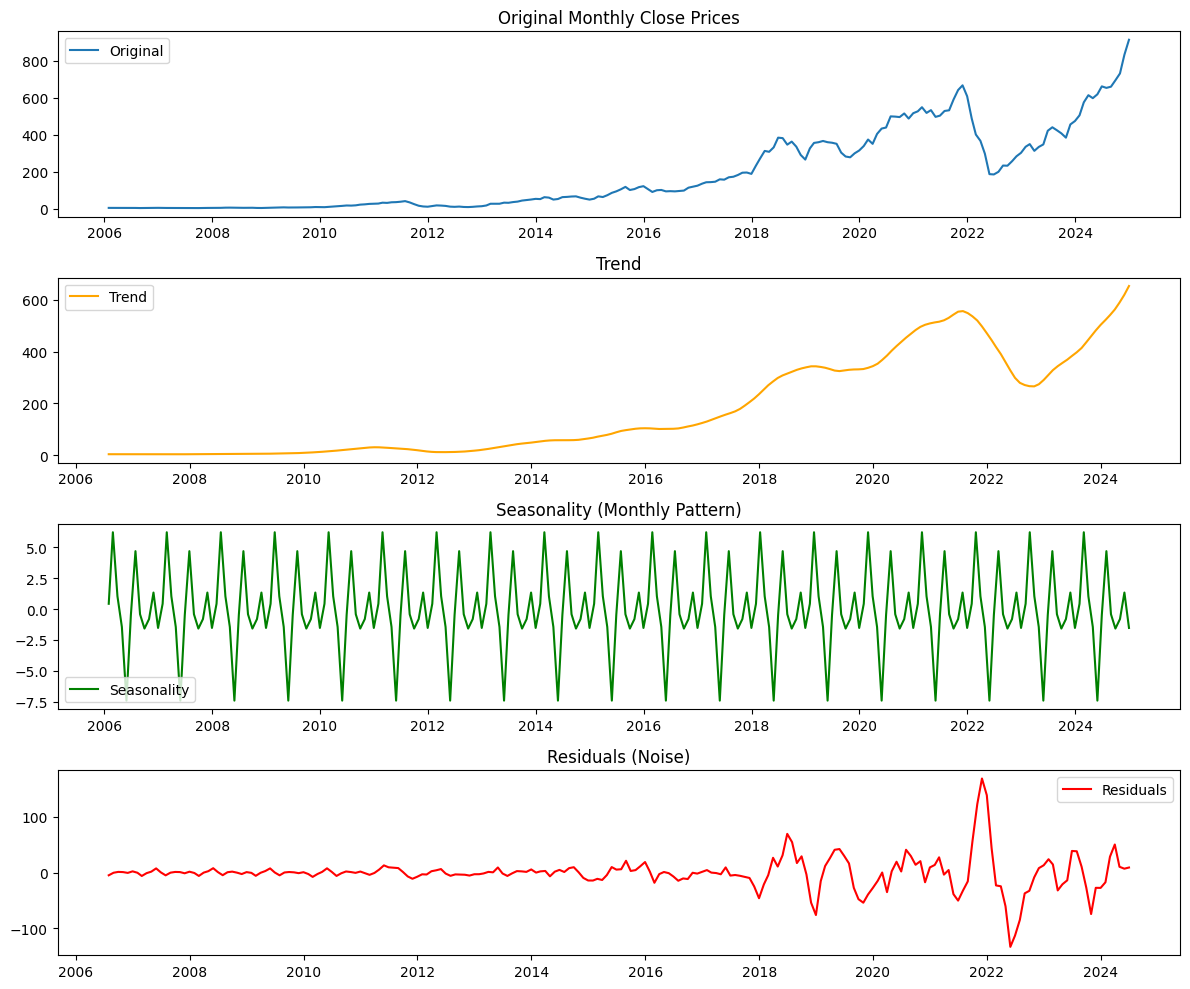

In [121]:
monthly_close = df['Close'].resample('M').mean()

# Decompose the time series
decomposition = seasonal_decompose(monthly_close, model='additive', period=12)

# Plot the components
plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
plt.plot(monthly_close, label='Original')
plt.title('Original Monthly Close Prices')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.title('Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.title('Seasonality (Monthly Pattern)')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.title('Residuals (Noise)')
plt.legend()

plt.tight_layout()
plt.show()

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            TSLA        TSLA        TSLA        TSLA       TSLA
Date                                                                 
2010-06-29    1.592667    1.666667    1.169333    1.266667  281494500
2010-06-30    1.588667    2.028000    1.553333    1.719333  257806500
2010-07-01    1.464000    1.728000    1.351333    1.666667  123282000
2010-07-02    1.280000    1.540000    1.247333    1.533333   77097000
2010-07-06    1.074000    1.333333    1.055333    1.333333  103003500
...                ...         ...         ...         ...        ...
2024-12-23  430.600006  434.510010  415.410004  431.000000   72698100
2024-12-24  462.279999  462.779999  435.140015  435.899994   59551800
2024-12-26  454.130005  465.329987  451.019989  465.160004   76366400
2024-12-27  431.660004  450.000000  426.500000  449.519989   82666800
2024-12-30  417.410004  427.000000  415.750000  419.399994   64941000

[3651 rows x 5 colu

<Figure size 1200x500 with 0 Axes>

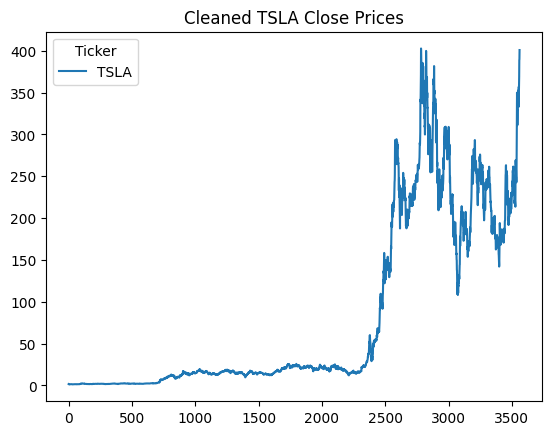

In [122]:
df = yf.download('TSLA', start='2006-01-01', end='2024-12-31')
print(df)

df_cleaned = df.dropna()

# Remove duplicate rows
df_cleaned = df_cleaned[~df_cleaned.index.duplicated(keep='first')]

# Check for consitency
expected_dates = pd.date_range(start='2006-01-01', end='2024-12-31', freq='B') 
missing_dates = expected_dates.difference(df_cleaned.index)

if len(missing_dates) > 0:
    print(f"Missing dates:\n{missing_dates}")
else:
    print("No missing dates found in the dataset.")

# Remove outliers
from scipy.stats import zscore
z_scores = zscore(df_cleaned[['Open', 'High', 'Low', 'Close', 'Volume']])
df_cleaned = df_cleaned[(z_scores < 3).all(axis=1)]  

df_cleaned.reset_index(inplace=True)

# Verify cleaned dataset
print("Cleaned dataset:")
print(df_cleaned.head())

# Checkk distribtion
plt.figure(figsize=(12, 5))
df_cleaned['Close'].plot(title='Cleaned TSLA Close Prices')
plt.show()

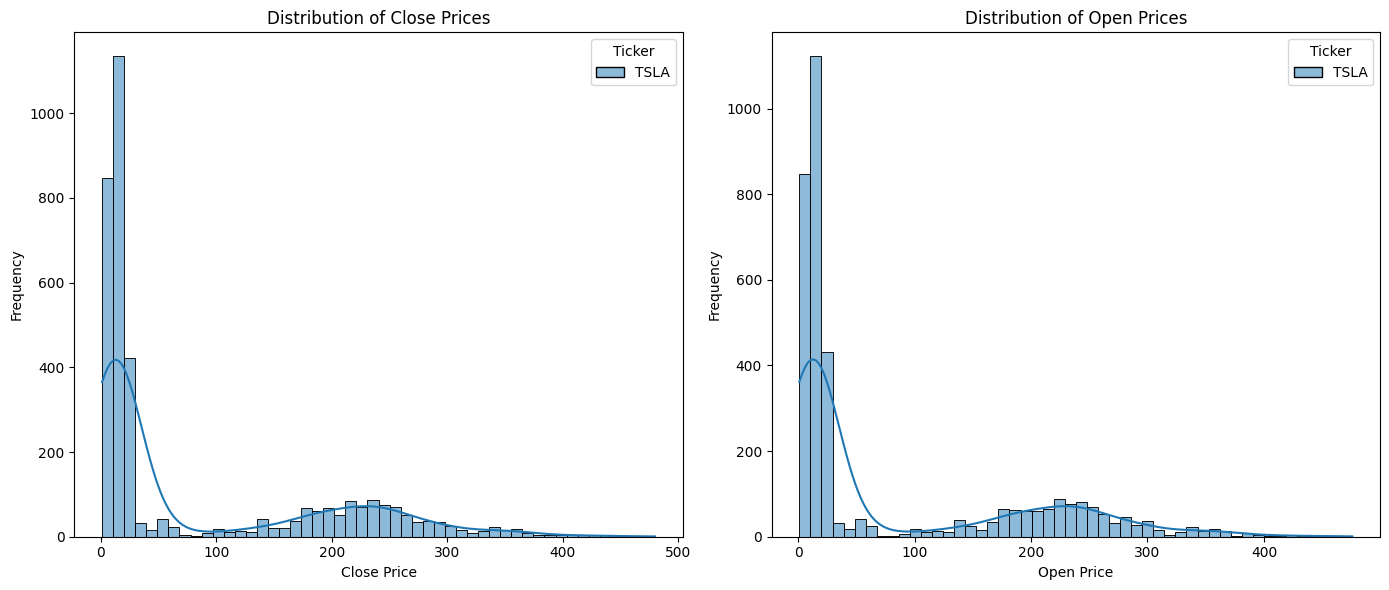

In [123]:
plt.figure(figsize=(14, 6))

# Close price distribution
plt.subplot(1, 2, 1)
sns.histplot(df['Close'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')

# Open price distribution
plt.subplot(1, 2, 2)
sns.histplot(df['Open'], bins=50, kde=True, color='salmon')
plt.title('Distribution of Open Prices')
plt.xlabel('Open Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<Figure size 1400x1000 with 0 Axes>

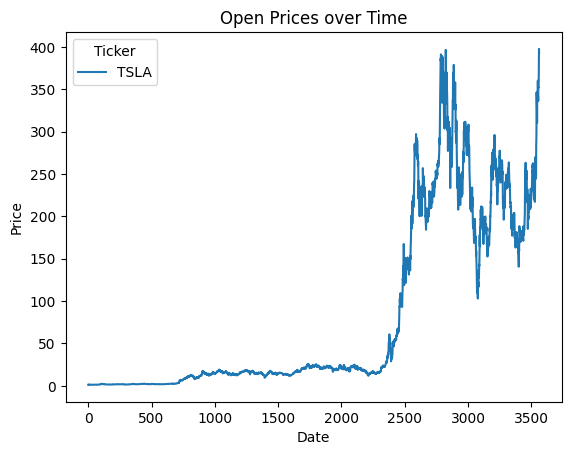

In [124]:
# Visualize the attributes: [Open, High, Low, Close, Volume]
plt.figure(figsize=(14, 10))

# Plot Open prices
df_cleaned['Open'].plot()
plt.title('Open Prices over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

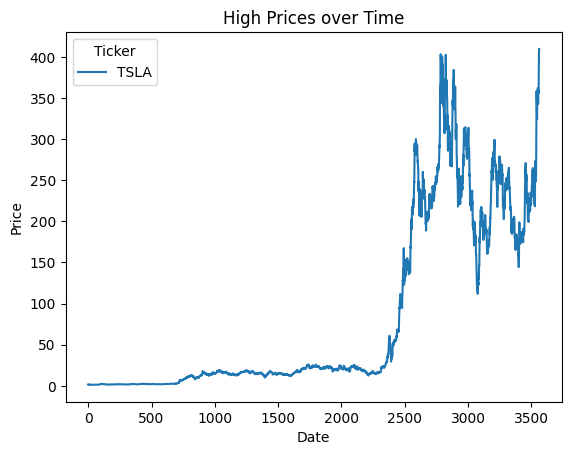

In [125]:
# Plot High prices
df_cleaned['High'].plot()
plt.title('High Prices over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

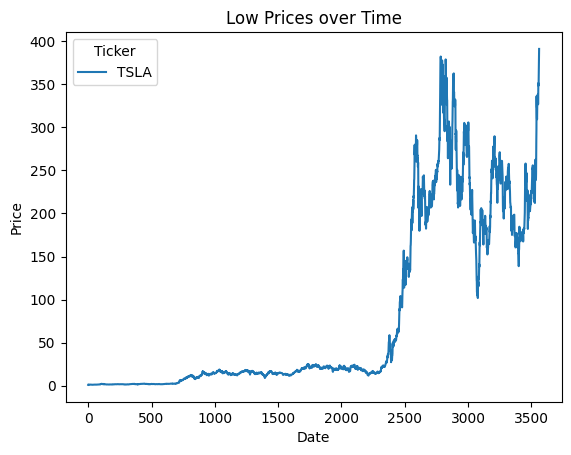

In [126]:
# Plot Low prices
df_cleaned['Low'].plot()
plt.title('Low Prices over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

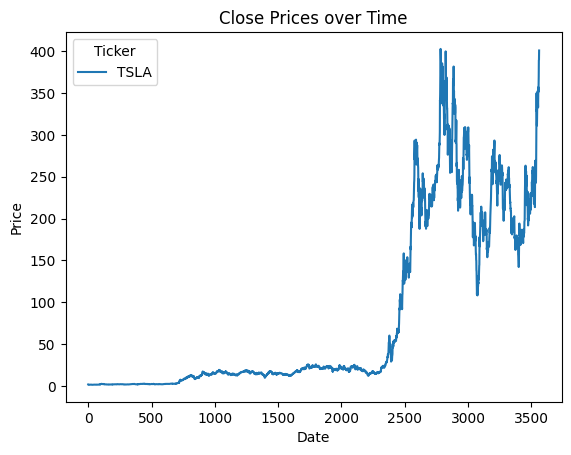

In [127]:
# Plot Close prices
df_cleaned['Close'].plot()
plt.title('Close Prices over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

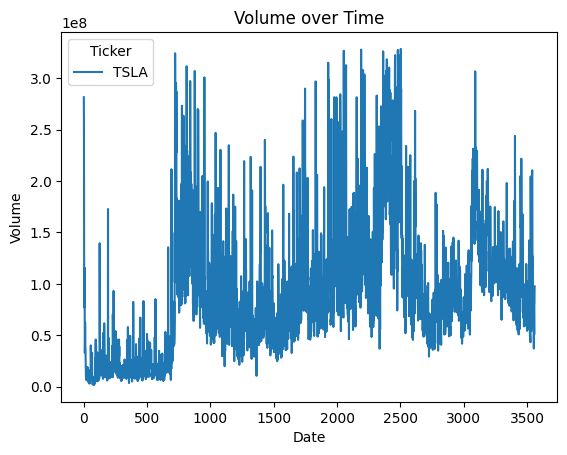

In [128]:
# Plot Volume
df_cleaned['Volume'].plot()
plt.title('Volume over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

/tmp/ipykernel_75829/1566797801.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_close = df['Close'].resample('M').mean()


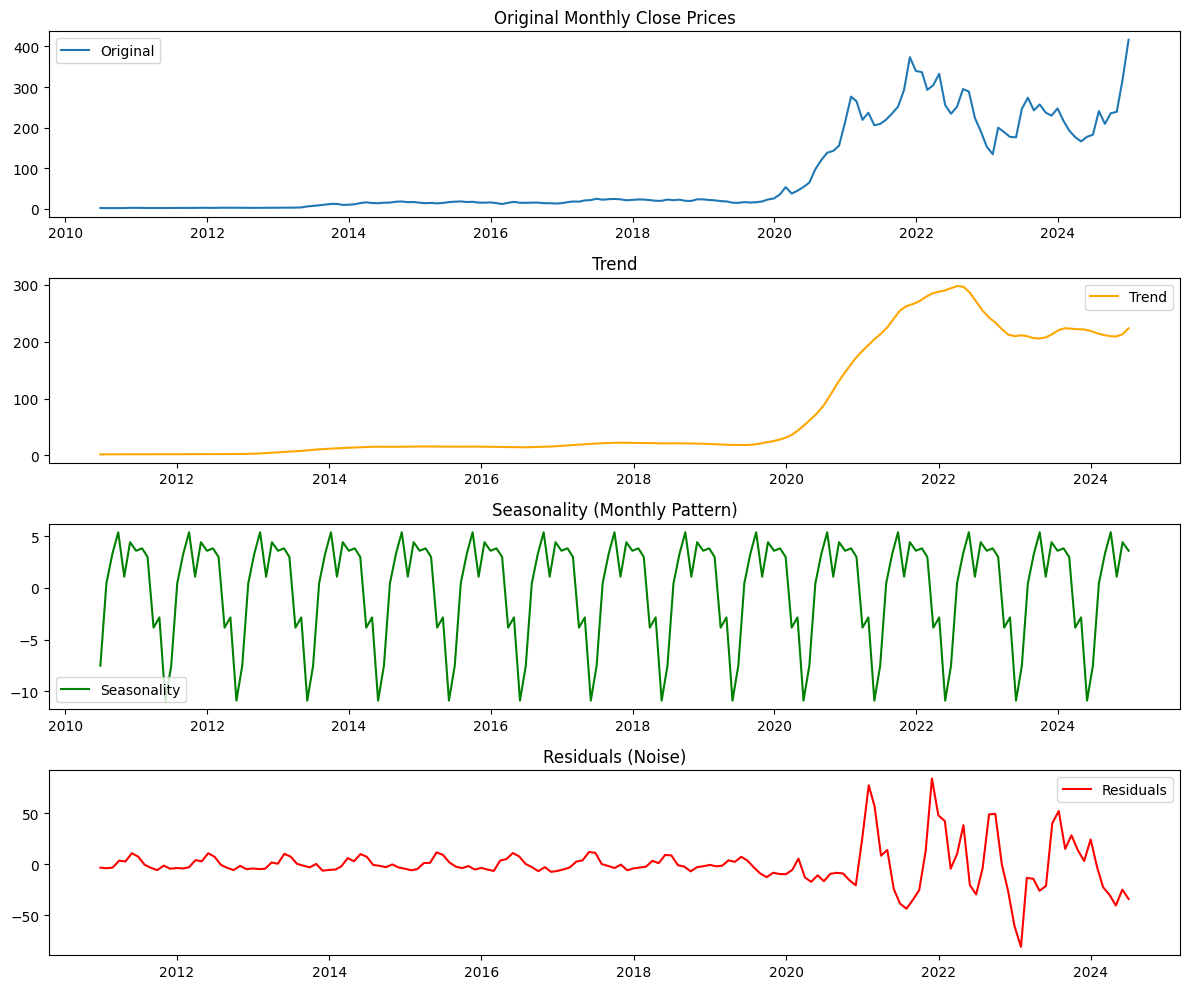

In [129]:
monthly_close = df['Close'].resample('M').mean()

# Decompose the time series
decomposition = seasonal_decompose(monthly_close, model='additive', period=12)

# Plot the components
plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
plt.plot(monthly_close, label='Original')
plt.title('Original Monthly Close Prices')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.title('Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.title('Seasonality (Monthly Pattern)')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.title('Residuals (Noise)')
plt.legend()

plt.tight_layout()
plt.show()

In [2]:
tickers = {
    "Microsoft": "MSFT",
    "IBM": "IBM",
    "Amazon": "AMZN",
    "Facebook (Meta)": "META",
    "Apple": "AAPL",
    "Netflix": "NFLX",
    "Tesla": "TSLA"
}

In [3]:
def predict_stock(ticker_symbol, name, start="2006-01-01", end="2024-12-31"):
    # Load Data
    df = yf.download(ticker_symbol, start=start, end=end)
    if df.empty:
        print(f"No data for {name}")
        return
    
    data = df[["Close"]].dropna()
    
    # Normalize
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data)
    
    # Prepare Data
    seq_len = 60
    X, y = [], []
    for i in range(seq_len, len(scaled_data)):
        X.append(scaled_data[i-seq_len:i, 0])
        y.append(scaled_data[i, 0])
    
    X = np.array(X)
    y = np.array(y)
    X = X.reshape((X.shape[0], X.shape[1], 1))
    
    # Build Model
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)),
        LSTM(50),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Train
    model.fit(X, y, epochs=10, batch_size=32, verbose=0)
    
    # Predict
    predicted = model.predict(X)
    predicted = scaler.inverse_transform(predicted)
    real = scaler.inverse_transform(y.reshape(-1, 1))
    
    # Plot
    plt.figure(figsize=(10,5))
    plt.plot(real, label='Actual Price', color='black')
    plt.plot(predicted, label='Predicted Price', color='blue')
    plt.title(f"{name} Stock Price Prediction")
    plt.xlabel("Days")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.show()

[*********************100%***********************]  1 of 1 completed


148/148 [==============================] - 2s 11ms/step


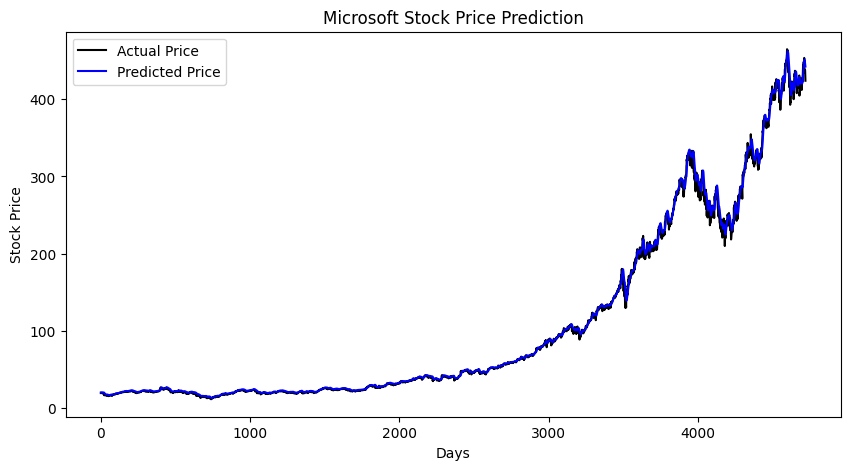

In [6]:
predict_stock(tickers["Microsoft"], "Microsoft")

[*********************100%***********************]  1 of 1 completed


148/148 [==============================] - 2s 10ms/step


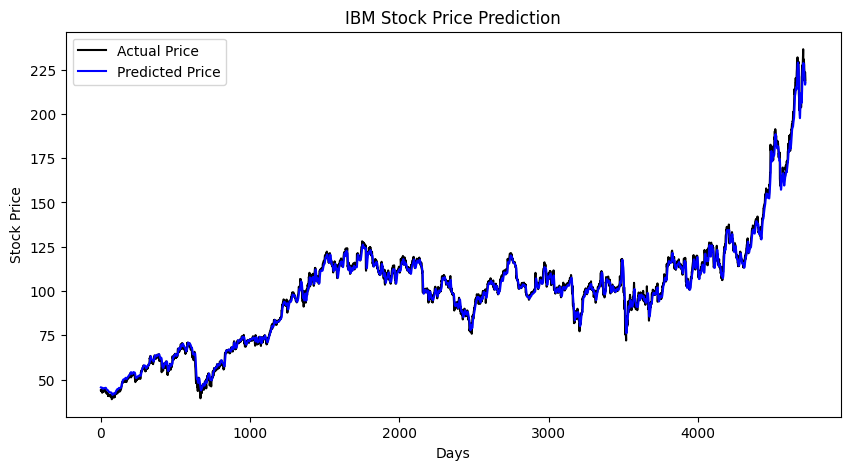

In [7]:
predict_stock(tickers["IBM"], "IBM")

[*********************100%***********************]  1 of 1 completed


148/148 [==============================] - 2s 10ms/step


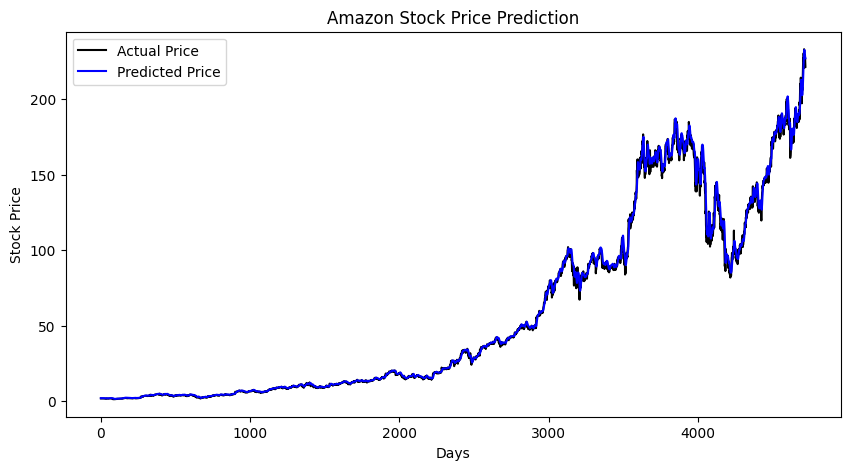

In [8]:
predict_stock(tickers["Amazon"], "Amazon")

[*********************100%***********************]  1 of 1 completed


98/98 [==============================] - 2s 10ms/step


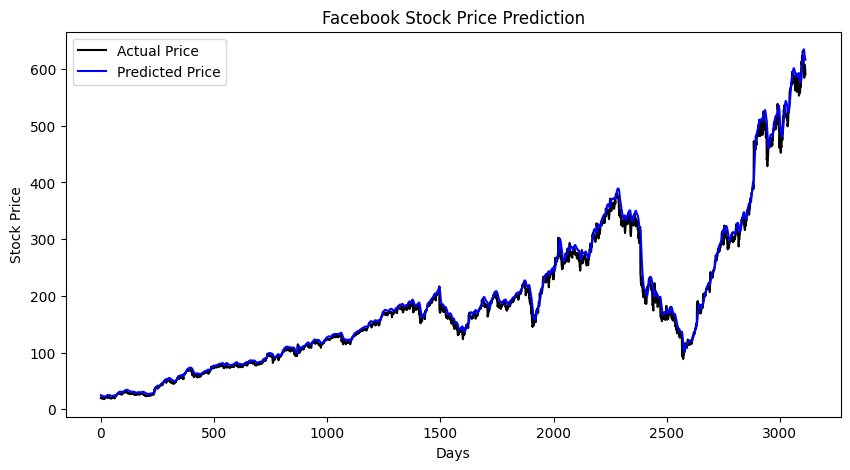

In [10]:
predict_stock(tickers["Facebook (Meta)"], "Facebook")

[*********************100%***********************]  1 of 1 completed


148/148 [==============================] - 2s 11ms/step


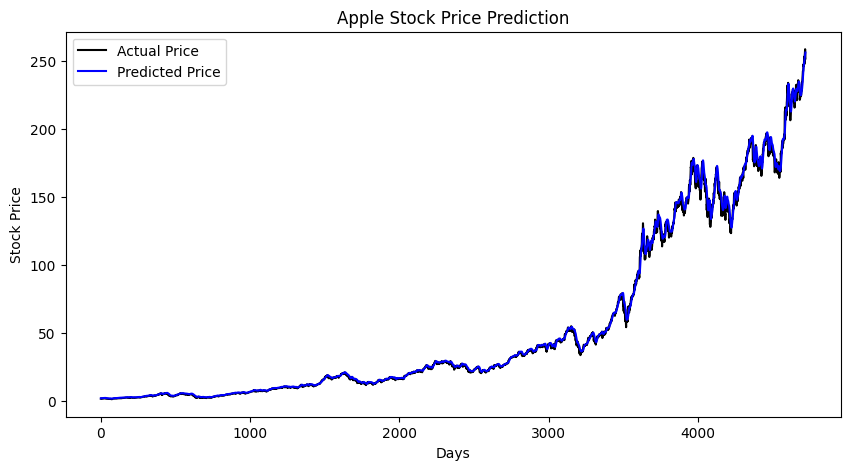

In [11]:
predict_stock(tickers["Apple"], "Apple")

[*********************100%***********************]  1 of 1 completed


148/148 [==============================] - 2s 11ms/step


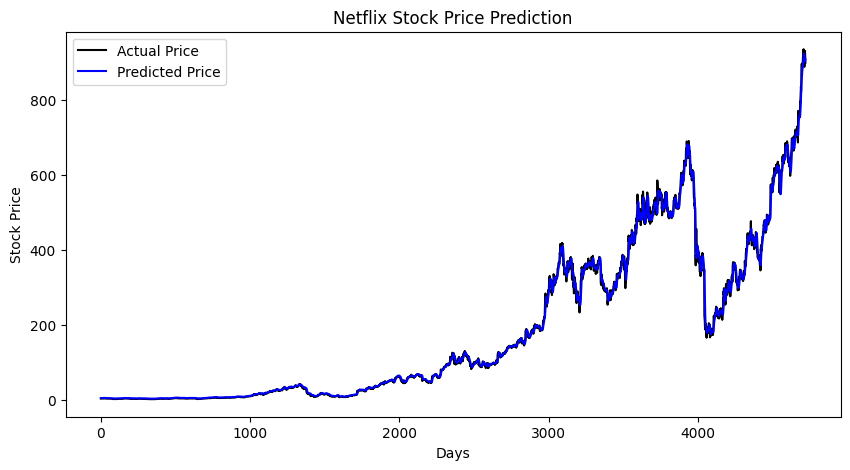

In [12]:
predict_stock(tickers["Netflix"], "Netflix")

[*********************100%***********************]  1 of 1 completed


113/113 [==============================] - 2s 10ms/step


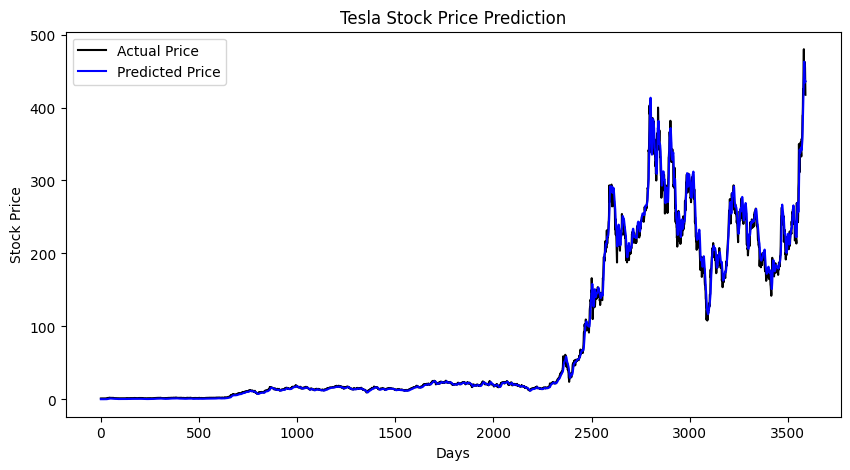

In [13]:
predict_stock(tickers["Tesla"], "Tesla")